<h3> Importing Libraries: </h3

In [226]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
from sklearn.preprocessing import PowerTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

<h3> Reading the Data: </h3>

In [2]:
pd.set_option('display.max_columns', None) # For seeing all the columns

In [3]:
#Reading the data
df = pd.read_csv('/Users/macbookair/Documents/Credit score classification/Credit score classification_train.csv')


/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_50000/3923727183.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/macbookair/Documents/Credit score classification/Credit score classification_train.csv')


In [4]:
#Displaying the data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<h3> Exploratory data analysis before feature engineering:</h3

In [5]:
#Examining the dataset for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# Examining the point statistics of the data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
# Examining the number of null values:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
#Taking the numerical columns for the correlation analysis:
correlation_cols = ['Age','Monthly_Inhand_Salary','Num_Bank_Accounts', 
                    'Num_Credit_Card','Interest_Rate','Num_of_Loan',
                    'Delay_from_due_date','Num_of_Delayed_Payment',
                    'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
                    'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [9]:
#creating a sliced data frame of the numerical features:
df_corr = df[correlation_cols]
df_corr.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,1824.843333,3,4,3,4,3,7,4.0,809.98,26.822620,49.574949,80.41529543900253,312.49408867943663
1,23,NaN,3,4,3,4,-1,NaN,4.0,809.98,31.944960,49.574949,118.28022162236736,284.62916249607184
2,-500,NaN,3,4,3,4,3,7,4.0,809.98,28.609352,49.574949,81.699521264648,331.2098628537912
3,23,NaN,3,4,3,4,5,4,4.0,809.98,31.377862,49.574949,199.4580743910713,223.45130972736786
4,23,1824.843333,3,4,3,4,6,NaN,4.0,809.98,24.797347,49.574949,41.420153086217326,341.48923103222177


<h4> Correlation of the numnerical features before feature engineering: </h4

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_50000/3000279684.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr.corr(), dtype = np.bool)


<AxesSubplot:>

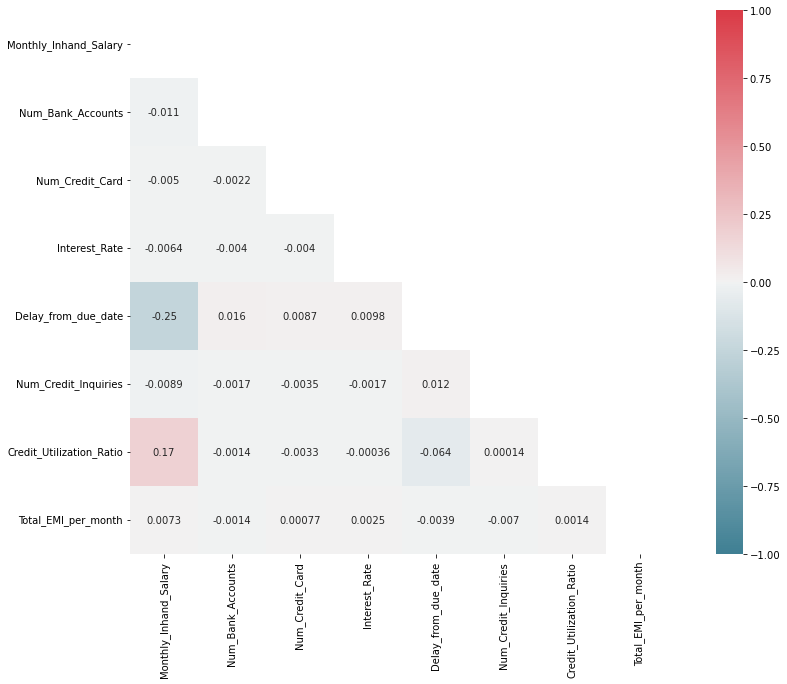

In [10]:
#Generating a correlation matrix heatmap:
mask = np.zeros_like(df_corr.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df_corr.corr(), mask=mask, cmap=cmap, center = 0, square = True, annot=True, vmin = -1, vmax = 1)


<h3> Feature Engineering </h3>
<h4> Data cleaning workflow for the object data types: </h4>
<p>1. Convert the data type to string. </p>
<p>2. strip the '_' from the values. </p>
<p>3. convert the data type to float. </p>
<p>4. Using for loop and if conditional statements set the boundary values based on logic. </p>
<p>5. Replace the old data with the cleaned and engineered data. </p> 

<h4> Feature name : Num_of_Delayed_Payment </h4>

In [11]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].values.astype(str)

delayed_list = []
for i in range(0,len(df.Num_of_Delayed_Payment)):
    s = df.Num_of_Delayed_Payment.iloc[i]
    delayed_list.append(s.strip('_'))
    
df['Num_of_Delayed_Payment'] = delayed_list

df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].values.astype(float)

right_delayed_list = []
for i in range(0,len(df.Num_of_Delayed_Payment)):
    s = df.Num_of_Delayed_Payment.iloc[i]
    if ((s >= 0) and (s<100)):
        s = s
        right_delayed_list.append(s)
    else:
        s = np.nan
        right_delayed_list.append(s)
        
df['Num_of_Delayed_Payment'] = right_delayed_list

df['Num_of_Delayed_Payment'].fillna(df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform('median'),
                                    inplace = True)

print (df['Num_of_Delayed_Payment'].info())

print ('-'*50)

print (df['Num_of_Delayed_Payment'].describe())



<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean         13.338910
std           6.305296
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          98.000000
Name: Num_of_Delayed_Payment, dtype: float64


<h4> Feature name: Amount_invested_monthly </h4>

In [12]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].values.astype(str)

invested_list = []
for i in range(0,len(df.Amount_invested_monthly)):
    s = df.Amount_invested_monthly.iloc[i]
    invested_list.append(s.strip('_'))
    
df['Amount_invested_monthly'] = invested_list

df['Amount_invested_monthly']=df['Amount_invested_monthly'].values.astype(float)

right_invested_list = []
for i in range(0,len(df.Amount_invested_monthly)):
    s = df.Amount_invested_monthly.iloc[i]
    if (s >= 0):
        s = s
        right_invested_list.append(s)
    else:
        s = np.absolute(s)
        right_invested_list.append(s)
        
df['Amount_invested_monthly'] = right_invested_list

df['Amount_invested_monthly'].fillna(df.groupby('Customer_ID')['Amount_invested_monthly'].transform('median'),
                                     inplace = True)

print (df['Amount_invested_monthly'].info())

print ('-'*50)

print (df['Amount_invested_monthly'].describe())



<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Amount_invested_monthly
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean        617.257610
std        1999.677146
min           0.000000
25%          75.356284
50%         136.173912
75%         263.231662
max       10000.000000
Name: Amount_invested_monthly, dtype: float64


<h4> Feature name: Monthly_Inhand_Salary </h4>

In [13]:
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].values.astype(str)

salary_list = []
for i in range(0,len(df.Monthly_Inhand_Salary)):
    s = df.Monthly_Inhand_Salary.iloc[i]
    salary_list.append(s.strip('_'))
    
df['Monthly_Inhand_Salary'] = salary_list

df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].values.astype(float)

right_salary_list = []
for i in range(0,len(df.Monthly_Inhand_Salary)):
    s = df.Monthly_Inhand_Salary.iloc[i]
    if (s >= 0):
        s = s
        right_salary_list.append(s)
    else:
        s = np.absolute(s)
        right_salary_list.append(s)
        
df['Monthly_Inhand_Salary'] = right_salary_list

df['Monthly_Inhand_Salary'].fillna(df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform('median'), 
                                   inplace = True)

print (df['Monthly_Inhand_Salary'].info())

print ('-'*50)

print (df['Monthly_Inhand_Salary'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Inhand_Salary
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean       4198.490149
std        3187.491752
min         303.645417
25%        1626.761667
50%        3095.978333
75%        5961.637500
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


<h4> Feature name: Monthly_Balance </h4>

In [14]:
df['Monthly_Balance']=df['Monthly_Balance'].values.astype(str)

balance_list = []
for i in range(0,len(df.Monthly_Balance)):
    s = df.Monthly_Balance.iloc[i]
    balance_list.append(s.strip('_'))
    
df['Monthly_Balance'] = balance_list

df['Monthly_Balance']=df['Monthly_Balance'].values.astype(float)

right_balance_list = []
for i in range(0,len(df.Monthly_Balance)):
    s = df.Monthly_Balance.iloc[i]
    if (s >= 0):
        s = s
        right_balance_list.append(s)
    else:
        s = np.absolute(s)
        right_balance_list.append(s)
        
df['Monthly_Balance'] = right_balance_list

df['Monthly_Balance'].fillna(df.groupby('Customer_ID')['Monthly_Balance'].transform('median'), 
                             inplace = True)

print (df['Monthly_Balance'].info())

print ('-'*50)

print (df['Monthly_Balance'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Balance
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    1.000000e+05
mean     3.000000e+22
std      3.162151e+24
min      7.759665e-03
25%      2.703231e+02
50%      3.372971e+02
75%      4.719681e+02
max      3.333333e+26
Name: Monthly_Balance, dtype: float64


<h4> Feature name: Credit_History_Age </h4>
<h4> Data cleaning workflow: </h4>
<p>1. Convert the data type to string. </p>
<p>2. split the values by the delimiter 'and' and expand the feature into multiple columns (in this case 2 columns). </p>
<p>3. Take the first column which has the years information and strip 'Years' from the value. </p>
<p>4. Replace the feature column in the dataframe with the resulting array.</p>
<p>5. convert the data type to float. </p>
<p>6. Impoute the null values with the median values that are grouped by the Customer_ID feature. </p>

In [15]:
df['Credit_History_Age']=df['Credit_History_Age'].values.astype(str)

split = df['Credit_History_Age'].str.split('and', expand=True)

credit_age = []
for i in range(0,len(split[0])):
     s = split[0].iloc[i]
     credit_age.append(s.replace('Years', ''))
    
df['Credit_History_Age'] = credit_age

df['Credit_History_Age']=df['Credit_History_Age'].values.astype(float)

df['Credit_History_Age'].fillna(df.groupby('Customer_ID')['Credit_History_Age'].transform('median'), 
                                inplace = True)

print (df['Credit_History_Age'].info())

print ('-'*50)

print (df['Credit_History_Age'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean         17.969440
std           8.315046
min           0.000000
25%          12.000000
50%          18.000000
75%          25.000000
max          33.000000
Name: Credit_History_Age, dtype: float64


<h4> Data cleaning workflow for the numerical data types: </h4>
<p>1. Convert the data type to string. </p>
<p>2. strip the '_' from the values. </p>
<p>3. convert the data type to float. </p>
<p>4. Using for loop and if conditional statements set the boundary values based on logic and frequency distribution. </p>
<p>5. Replace the old data with the cleaned and engineered data. </p> 

<h4> Feature name: Num_Credit_Inquiries </h4>

In [16]:
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].values.astype(str)

inquiries_list = []
for i in range(0,len(df.Num_Credit_Inquiries)):
    s = df.Num_Credit_Inquiries.iloc[i]
    inquiries_list.append(s.strip('_'))
    
df['Num_Credit_Inquiries'] = inquiries_list

df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].values.astype(float)

right_inquiries_list = []
for i in range(0,len(df.Num_Credit_Inquiries)):
    s = df.Num_Credit_Inquiries.iloc[i]
    if ((s >= 0) and (s < 20)):
        s = s
        right_inquiries_list.append(s)
    elif s > 20:
        s = np.nan
        right_inquiries_list.append(s)
    else:
        s = np.absolute(s)
        right_inquiries_list.append(s)
        
df['Num_Credit_Inquiries'] = right_inquiries_list

df['Num_Credit_Inquiries'].fillna(df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('median'), 
                                  inplace = True)

df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].values.astype(int)


print (df['Num_Credit_Inquiries'].info())

print ('-'*50)

print (df['Num_Credit_Inquiries'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Credit_Inquiries
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean          5.779350
std           3.861478
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64


<h4> Feature name: Age </h4>

In [17]:
df['Age']=df['Age'].values.astype(str)

age_list = []
for i in range(0,len(df.Age)):
    s = df.Age.iloc[i]
    age_list.append(s.strip('_'))
    
df['Age']=age_list

df['Age']=df['Age'].values.astype(float)

right_age_list = []
for i in range(0,len(df.Age)):
    s = df.Age.iloc[i]
    if ((s >= 0) and (s <= 65)):
        s = s
        right_age_list.append(s)
    else:
        s = np.nan
        right_age_list.append(s)
        
df['Age'] = right_age_list

df['Age'].fillna(df.groupby('Customer_ID')['Age'].transform('median'), inplace = True)

df['Age']=df['Age'].values.astype(int)

print (df['Age'].info())

print ('-'*50)

print (df['Age'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Age
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean         33.311180
std          10.764783
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64


<h4>Feature name: Delay_from_due_date:</h4>

In [18]:
right_due_list = []
for i in range(0,len(df.Delay_from_due_date)):
    s = df.Delay_from_due_date.iloc[i]
    if ((s >= 0) and (s <= 70)):
        s = s
        right_due_list.append(s)
    else:
        s = np.nan
        right_due_list.append(s)

df['Delay_from_due_date'] = right_due_list

df['Delay_from_due_date'].fillna(df.groupby('Customer_ID')['Delay_from_due_date'].transform('median'), 
                                 inplace = True)

print (df['Delay_from_due_date'].info())

print ('-'*50)

print (df['Delay_from_due_date'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Delay_from_due_date
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean         21.090380
std          14.828893
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


<h4>Feature name: Num_Bank_Accounts</h4>

In [19]:
#Supporting function:
def hist_plot(df, column, bins, xlim):
    plot = sns.histplot(data = df, x = column, bins = bins)
    plt.xlabel(column, fontsize = 14)
    plt.ylabel('Count',fontsize = 14)
    plt.title('Histogram of '+ column, fontsize = 18)
    plt.xlim(xlim)
    return plot

<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

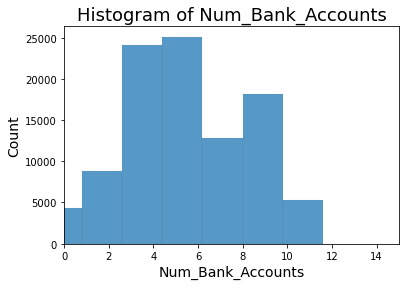

In [20]:
hist_plot(df, 'Num_Bank_Accounts', 1000, xlim = (0,15))

In [21]:
right_accounts_list = []
for i in range(0,len(df.Num_Bank_Accounts)):
    s = df.Num_Bank_Accounts.iloc[i]
    if ((s >= 0) and (s < 15)):
        s = s
        right_accounts_list.append(s)
    elif s > 15:
        s = np.nan
        right_accounts_list.append(s)
    else:
        s = np.nan
        right_accounts_list.append(s)
        
df['Num_Bank_Accounts'] = right_accounts_list

df['Num_Bank_Accounts'].fillna(df.groupby('Customer_ID')['Num_Bank_Accounts'].transform('median'), 
                               inplace = True)

print (df['Num_Bank_Accounts'].info())

print ('-'*50)

print (df['Num_Bank_Accounts'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Bank_Accounts
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean          5.368840
std           2.593273
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Bank_Accounts, dtype: float64


<h4>Feature name: Num_Credit_Card</h4>

<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

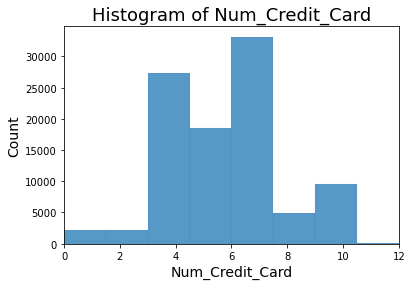

In [22]:
hist_plot(df, 'Num_Credit_Card', 1000, xlim = (0,12) )

In [23]:
right_card_list = []
for i in range(0,len(df.Num_Credit_Card)):
    s = df.Num_Credit_Card.iloc[i]
    if ((s >= 0) and (s < 12)):
        s = s
        right_card_list.append(s)
    elif s > 12:
        s = np.nan
        right_card_list.append(s)
    else:
        s = np.nan
        right_card_list.append(s)
        
df['Num_Credit_Card'] = right_card_list

df['Num_Credit_Card'].fillna(df.groupby('Customer_ID')['Num_Credit_Card'].transform('median'), 
                             inplace = True)

print (df['Num_Credit_Card'].info())

print ('-'*50)

print (df['Num_Credit_Card'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Credit_Card
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean          5.533680
std           2.067126
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64


<h4>Feature name: Interest_Rate</h4>

<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

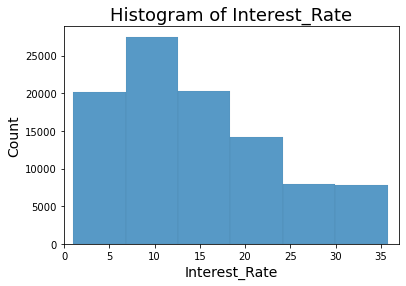

In [24]:
hist_plot(df, 'Interest_Rate', 1000, xlim = (0,37))

In [25]:
right_interest_list = []
for i in range(0,len(df.Interest_Rate)):
    s = df.Interest_Rate.iloc[i]
    if ((s >= 0) and (s <= 36)):
        s = s
        right_interest_list.append(s)
    elif s > 36:
        s = np.nan
        right_interest_list.append(s)
    else:
        s = np.nan
        right_interest_list.append(s)
        
df['Interest_Rate'] = right_interest_list

df['Interest_Rate'].fillna(df.groupby('Customer_ID')['Interest_Rate'].transform('median'), 
                           inplace = True)

print (df['Interest_Rate'].info())

print ('-'*50)

print (df['Interest_Rate'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Interest_Rate
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64


<h4>Feature name: Total_EMI_per_month</h4>

<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

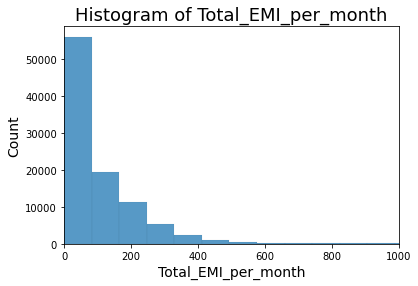

In [26]:
hist_plot(df, 'Total_EMI_per_month', 1000, xlim = (0,1000))

In [27]:
df['Total_EMI_per_month']=df['Total_EMI_per_month'].values.astype(str)
df['Total_EMI_per_month']=df['Total_EMI_per_month'].values.astype(float)

right_emi_list = []
for i in range(0,len(df.Total_EMI_per_month)):
    s = df.Total_EMI_per_month.iloc[i]
    if ((s >= 0) and (s <= 1200)):
        s = s
        right_emi_list.append(s)
    else:
        s = np.nan
        right_emi_list.append(s)
        
df['Total_EMI_per_month'] = right_emi_list

df['Total_EMI_per_month'].fillna(df.groupby('Customer_ID')['Total_EMI_per_month'].transform('mean'), 
                                 inplace = True)

print (df['Total_EMI_per_month'].info())

print ('-'*50)

print (df['Total_EMI_per_month'].describe())



<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Total_EMI_per_month
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean        105.135910
std         118.218229
min           0.000000
25%          29.197024
50%          66.409999
75%         146.590563
max        1194.784437
Name: Total_EMI_per_month, dtype: float64


<h4>Feature name: Amount_invested_monthly</h4>

<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

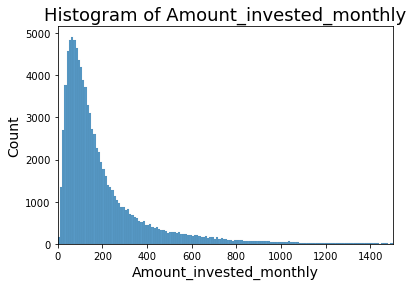

In [28]:
hist_plot(df, 'Amount_invested_monthly', 1000, xlim = (0,1500))

In [29]:
right_invested_list = []
for i in range(0,len(df.Amount_invested_monthly)):
    s = df.Amount_invested_monthly.iloc[i]
    if ((s >= 0) and (s <= 1500)):
        s = s
        right_invested_list.append(s)
    elif s > 1500:
        s = np.nan
        right_invested_list.append(s)
    else:
        s = np.nan
        right_invested_list.append(s)
        
df['Amount_invested_monthly'] = right_invested_list

df['Amount_invested_monthly'].fillna(df.groupby('Customer_ID')['Amount_invested_monthly'].transform('median'), 
                                     inplace = True)

print (df['Amount_invested_monthly'].info())

print ('-'*50)

print (df['Amount_invested_monthly'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Amount_invested_monthly
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean        193.644489
std         191.651433
min           0.000000
25%          73.969784
50%         129.921066
75%         235.694071
max        1497.705643
Name: Amount_invested_monthly, dtype: float64


<h4>Feature name: Monthly_Balance</h4>

In [30]:
right_balance_list = []
for i in range(0,len(df.Monthly_Balance)):
    s = df.Monthly_Balance.iloc[i]
    if ((s >= 0) and (s <= 15000)):
        s = s
        right_balance_list.append(s)
    elif s > 15000:
        s = np.nan
        right_balance_list.append(s)
    else:
        s = np.nan
        right_balance_list.append(s)
        
df['Monthly_Balance'] = right_balance_list

df['Monthly_Balance'].fillna(df.groupby('Customer_ID')['Monthly_Balance'].transform('median'), 
                             inplace = True)

print (df['Monthly_Balance'].info())

print ('-'*50)

print (df['Monthly_Balance'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Balance
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean        403.492393
std         214.423009
min           0.007760
25%         270.322511
50%         337.270985
75%         471.928804
max        1602.040519
Name: Monthly_Balance, dtype: float64


<h4>Feature name: Annual_Income</h4>

In [31]:
df['Annual_Income']=df['Annual_Income'].values.astype(str)

income_list = []
for i in range(0,len(df.Annual_Income)):
    s = df.Annual_Income.iloc[i]
    income_list.append(s.strip('_'))
    
df['Annual_Income'] = income_list

df['Annual_Income']=df['Annual_Income'].values.astype(float)

print (df['Annual_Income'].info())

print ('-'*50)

print (df['Annual_Income'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64


<h4>Feature name: Changed_Credit_Limit</h4>

In [32]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].values.astype(str)

limit_list = []
for i in range(0,len(df.Changed_Credit_Limit)):
    s = df.Changed_Credit_Limit.iloc[i]
    limit_list.append(s.strip('_'))
    
df['Changed_Credit_Limit'] = limit_list

right_limit_list = []
for i in range(0,len(df.Monthly_Balance)):
    s = df.Monthly_Balance.iloc[i]
    if s == '':
        s = np.nan
        right_limit_list.append(s)
    else:
        s = s
        right_limit_list.append(s)
        
df['Changed_Credit_Limit'] = right_limit_list

df['Changed_Credit_Limit'].fillna(df.groupby('Customer_ID')['Changed_Credit_Limit'].transform('median'), 
                                  inplace = True)

df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].values.astype(float)

print (df['Changed_Credit_Limit'].info())

print ('-'*50)

print (df['Changed_Credit_Limit'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Changed_Credit_Limit
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean        403.492393
std         214.423009
min           0.007760
25%         270.322511
50%         337.270985
75%         471.928804
max        1602.040519
Name: Changed_Credit_Limit, dtype: float64


<h4>Feature name: Outstanding_Debt</h4>

In [33]:
df['Outstanding_Debt']=df['Outstanding_Debt'].values.astype(str)

debt_list = []
for i in range(0,len(df.Outstanding_Debt)):
    s = df.Outstanding_Debt.iloc[i]
    debt_list.append(s.strip('_'))
    
df['Outstanding_Debt'] = debt_list

df['Outstanding_Debt']=df['Outstanding_Debt'].values.astype(float)

print (df['Outstanding_Debt'].info())

print ('-'*50)

print (df['Outstanding_Debt'].describe())



<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Outstanding_Debt
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64


<h4>Feature name: Num_of_Loan</h4>

<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

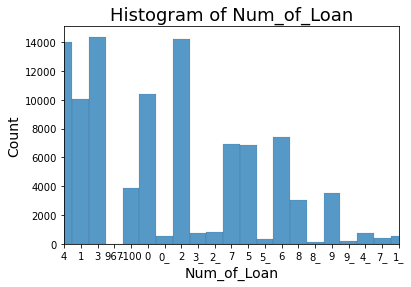

In [34]:
hist_plot(df, 'Num_of_Loan', 1000, xlim = (0,20))

In [35]:
df['Num_of_Loan']=df['Num_of_Loan'].values.astype(str)

loan_list = []
for i in range(0,len(df.Num_of_Loan)):
    s = df.Num_of_Loan.iloc[i]
    loan_list.append(s.strip('_'))
    
df['Num_of_Loan'] = loan_list

df['Num_of_Loan']=df['Num_of_Loan'].values.astype(float)

right_loan_list = []
for i in range(0,len(df.Num_of_Loan)):
    s = df.Num_of_Loan.iloc[i]
    if ((s >= 0) and (s<=10)):
        s = s
        right_loan_list.append(s)
    else:
        s = np.nan
        right_loan_list.append(s)
        
df['Num_of_Loan'] = right_loan_list

df['Num_of_Loan'].fillna(df.groupby('Customer_ID')['Num_of_Loan'].transform('median'), 
                         inplace = True)

df['Num_of_Loan']=df['Num_of_Loan'].values.astype(int)

print (df['Num_of_Loan'].info())

print ('-'*50)

print (df['Num_of_Loan'].describe())


<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Loan
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64


<h4>Feature name: Occupation</h4>

In [36]:
print(df['Occupation'].value_counts())

df['Occupation']=df['Occupation'].values.astype(str)

df['Occupation'].replace('Lawyer', 1, inplace = True)
df['Occupation'].replace('Architect', 2, inplace = True)
df['Occupation'].replace('Engineer', 3, inplace = True)
df['Occupation'].replace('Scientist', 4, inplace = True)
df['Occupation'].replace('Mechanic', 5, inplace = True)
df['Occupation'].replace('Accountant', 6, inplace = True)
df['Occupation'].replace('Developer', 7, inplace = True)
df['Occupation'].replace('Media_Manager', 8, inplace = True)
df['Occupation'].replace('Teacher', 9, inplace = True)
df['Occupation'].replace('Entrepreneur', 10, inplace = True)
df['Occupation'].replace('Doctor', 11, inplace = True)
df['Occupation'].replace('Journalist', 12, inplace = True)
df['Occupation'].replace('Manager', 13, inplace = True)
df['Occupation'].replace('Musician', 14, inplace = True)
df['Occupation'].replace('Writer', 15, inplace = True)
df['Occupation'].replace('_______', np.nan, inplace = True)



df['Occupation'].fillna(df.groupby('Customer_ID')['Occupation'].transform('median'), 
                        inplace = True)
df['Occupation']=df['Occupation'].values.astype(int)

df['Occupation']=df['Occupation'].values.astype(str)

df['Occupation'].replace('1','Lawyer', inplace = True)
df['Occupation'].replace('2','Architect',  inplace = True)
df['Occupation'].replace('3','Engineer',  inplace = True)
df['Occupation'].replace('4','Scientist',  inplace = True)
df['Occupation'].replace('5','Mechanic',  inplace = True)
df['Occupation'].replace('6','Accountant',  inplace = True)
df['Occupation'].replace('7','Developer',  inplace = True)
df['Occupation'].replace('8','Media_Manager',  inplace = True)
df['Occupation'].replace('9','Teacher',  inplace = True)
df['Occupation'].replace('10','Entrepreneur', inplace = True)
df['Occupation'].replace('11','Doctor',  inplace = True)
df['Occupation'].replace('12','Journalist',  inplace = True)
df['Occupation'].replace('13','Manager',  inplace = True)
df['Occupation'].replace('14','Musician',  inplace = True)
df['Occupation'].replace('15','Writer',  inplace = True)

occupation_dummies = pd.get_dummies(df.Occupation, prefix='Occupation')

df = pd.concat([df, occupation_dummies], axis=1)

print (occupation_dummies.info())

print ('-'*50)

print (occupation_dummies.describe().T)

df.head()


_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Occupation_Accountant     100000 non-null  uint8
 1   Occupation_Architect      100000 non-null  uint8
 2   Occupation_Developer      100000 non-null  uint8
 3   Occupation_Doctor         100000 non-null  uint8
 4   Occupation_Engineer       100000 non-null  uint8
 5   Occupation_Entrepreneur   100000 non-null  uint8
 6   Occupation_Journalist     100000 non-null  uint8
 7   Occupation_Lawye

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,312.494089,4,_,809.98,26.822620,22.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.5,284.629162,4,Good,809.98,31.944960,22.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,331.209863,4,Good,809.98,28.609352,22.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,223.451310,4,Good,809.98,31.377862,22.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,6.5,341.489231,4,Good,809.98,24.797347,22.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<h4>Feature name: Credit_Mix</h4>

In [37]:
print (df['Credit_Mix'].value_counts())

df['Credit_Mix']=df['Credit_Mix'].values.astype(str)

df['Credit_Mix'].replace('Standard', 1, inplace = True)
df['Credit_Mix'].replace('Good', 2, inplace = True)
df['Credit_Mix'].replace('Bad', 3, inplace = True)
df['Credit_Mix'].replace('_', np.nan, inplace = True)



df['Credit_Mix'].fillna(df.groupby('Customer_ID')['Credit_Mix'].transform('median'), 
                        inplace = True)

df['Credit_Mix']=df['Credit_Mix'].values.astype(int)


print (df['Credit_Mix'].info())

print ('-'*50)

print (df['Credit_Mix'].describe())

df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_Mix
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.00000
mean          1.77920
std           0.80462
min           1.00000
25%           1.00000
50%           2.00000
75%           2.00000
max           3.00000
Name: Credit_Mix, dtype: float64


1    45848
2    30384
3    23768
Name: Credit_Mix, dtype: int64

<h4>Feature name: Payment_of_Min_Amount</h4>

In [38]:
print (df['Payment_of_Min_Amount'].value_counts())

df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].values.astype(str)

df['Payment_of_Min_Amount'].replace('Yes', 1, inplace = True)
df['Payment_of_Min_Amount'].replace('No', 0, inplace = True)
df['Payment_of_Min_Amount'].replace('NM', np.nan, inplace = True)

df['Payment_of_Min_Amount'].fillna(df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform('median'), 
                                   inplace = True)

df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].values.astype(int)

print (df['Payment_of_Min_Amount'].info())

print ('-'*50)

print (df['Payment_of_Min_Amount'].describe())

print ('-'*50)

print (df['Payment_of_Min_Amount'].value_counts())



Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Payment_of_Min_Amount
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.000000
mean          0.594320
std           0.491026
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Payment_of_Min_Amount, dtype: float64
--------------------------------------------------
1    59432
0    40568
Name: Payment_of_Min_Amount, dtype: int64


<h4>Feature name: Credit_Score</h4>

In [39]:
#Supporting function:
def count_pie_chart(dataframe, col_name, normalize = True, 
                    colors = sns.color_palette("viridis", 3), percentage = True):
    if percentage == True:
        counts = dataframe[col_name].value_counts(normalize = normalize)*100
    else:
        counts = dataframe[col_name].value_counts(normalize = normalize)
    
    plt.figure(figsize=(20,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    explode = [0.01]*len(counts.index)
    plt.pie(counts, labels=list(counts.index), colors=colors,autopct='%1.1f%%', explode = explode)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [40]:
print (df.Credit_Score.value_counts())

df['Credit_Score']=df['Credit_Score'].values.astype(str)

df['Credit_Score'].replace('Good', 1, inplace = True)
df['Credit_Score'].replace('Standard', 2, inplace = True)
df['Credit_Score'].replace('Poor', 3, inplace = True)

df['Credit_Score']=df['Credit_Score'].values.astype(int)

print (df['Credit_Score'].info())

print ('-'*50)

print (df['Credit_Score'].describe())

print ('-'*50)

print (df['Credit_Score'].value_counts())



Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_Score
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
None
--------------------------------------------------
count    100000.00000
mean          2.11170
std           0.67512
min           1.00000
25%           2.00000
50%           2.00000
75%           3.00000
max           3.00000
Name: Credit_Score, dtype: float64
--------------------------------------------------
2    53174
3    28998
1    17828
Name: Credit_Score, dtype: int64


<h4>Feature name: Type_of_Loan</h4>
<h5> This feature is a bag of words. </h5>
<h5> Some customers got same type of loan multiple times. </h5>
<h5> To accomodate all thos informations the following workflow is followed. </h5>

<p>1. Convert the data type to string. </p>
<p>2. strip the 'and' from the values. </p>
<p>3. counted each type of loan using ',' as delimiter. </p>
<p>4. The resulting array is used as the feature in the main data frame. </p>

In [41]:
#Supporting function:
def counter(dataframe, column, category, delimiter):
    new_array = []
    for s in dataframe[column]:
        slist = s.split(delimiter)
        if category in slist:
            c = slist.count(category)
            new_array.append(c) 
        else:
            new_array.append(0)
    return new_array  


In [42]:
df["Type_of_Loan"]=df["Type_of_Loan"].values.astype(str)

Type_of_Loan = []
for i in range(0, len(df.Type_of_Loan)):
    s = df.Type_of_Loan.iloc[i]
    Type_of_Loan.append(s.replace('and', ''))
    
Auto_loan = counter(df, 'Type_of_Loan', 'Auto Loan', ',')
Credit_Builder_Loan = counter(df, 'Type_of_Loan', 'Credit-Builder Loan', ',')
Payday_Loan = counter(df, 'Type_of_Loan', 'Payday_Loan', ',')
Personal_Loan = counter(df, 'Type_of_Loan', 'Personal Loan', ',')
Not_Specified = counter(df, 'Type_of_Loan', 'Not Specified', ',')
Student_Loan = counter(df, 'Type_of_Loan', 'Student Loan', ',')
Debt_Consolidation_Loan = counter(df, 'Type_of_Loan', 'Debt Consolidation Loan', ',')
Mortgage_Loan = counter(df, 'Type_of_Loan', 'Mortgage Loan', ',')
Home_Equity_Loan = counter(df, 'Type_of_Loan', 'Home Equity Loan', ',')

df['Auto_loan'] = Auto_loan
df['Credit_Builder_Loan'] = Credit_Builder_Loan
df['Payday_Loan'] = Payday_Loan
df['Personal_Loan'] = Personal_Loan
df['Not_Specified'] = Not_Specified
df['Student_Loan'] = Student_Loan
df['Debt_Consolidation_Loan'] = Debt_Consolidation_Loan
df['Mortgage_Loan'] = Mortgage_Loan
df['Home_Equity_Loan'] =Home_Equity_Loan

df.drop('Type_of_Loan', axis = 1, inplace = True)


print (df[['Auto_loan','Credit_Builder_Loan', 'Payday_Loan', 'Personal_Loan', 'Not_Specified',
          'Student_Loan', 'Debt_Consolidation_Loan','Mortgage_Loan', 'Home_Equity_Loan']].info())

print ('-'*50)

print (df[['Auto_loan','Credit_Builder_Loan', 'Payday_Loan', 'Personal_Loan', 'Not_Specified',
          'Student_Loan', 'Debt_Consolidation_Loan','Mortgage_Loan', 'Home_Equity_Loan']].describe())
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Auto_loan                100000 non-null  int64
 1   Credit_Builder_Loan      100000 non-null  int64
 2   Payday_Loan              100000 non-null  int64
 3   Personal_Loan            100000 non-null  int64
 4   Not_Specified            100000 non-null  int64
 5   Student_Loan             100000 non-null  int64
 6   Debt_Consolidation_Loan  100000 non-null  int64
 7   Mortgage_Loan            100000 non-null  int64
 8   Home_Equity_Loan         100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB
None
--------------------------------------------------
           Auto_loan  Credit_Builder_Loan  Payday_Loan  Personal_Loan  \
count  100000.000000         100000.00000     100000.0   100000.00000   
mean        0.095680              0.10416          0.0        0.1020

<h3>Payment_Behaviour</h3>
<p> The Parment_Behaviour feature contains two information one is the spending behaviour and the other is  the payment behaviour.</p>

In [43]:
# Supporting function:
def make_encode(dataframe, column, category, delimiter):
    new_array_name = []
    for s in dataframe[column]:
        slist = s.split(delimiter)
        if category in slist:
            new_array_name.append(1) 
        else:
            new_array_name.append(0)
    return new_array_name

def make_encode_label(dataframe, column, category1, category2, delimiter):
    new_array_name = []
    for s in dataframe[column]:
        slist = s.split(delimiter)
        if category1 in slist:
            new_array_name.append(1) 
        elif category2 in slist:
            new_array_name.append(2) 
        else:
            new_array_name.append(3)
    return new_array_name

In [44]:
df['Payment_Behaviour']=df['Payment_Behaviour'].values.astype(str)

spent = make_encode(df,'Payment_Behaviour', 'High', '_' )

df['Spent_Behaviour'] = spent

payment_cleaned = make_encode_label(df, 'Payment_Behaviour', 'Small', 'Medium', '_')

df['Payment_Behaviour'] = payment_cleaned

print (df[['Payment_Behaviour', 'Spent_Behaviour']].info())

print ('-'*50)

print (df[['Payment_Behaviour', 'Spent_Behaviour']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Payment_Behaviour  100000 non-null  int64
 1   Spent_Behaviour    100000 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB
None
--------------------------------------------------
       Payment_Behaviour  Spent_Behaviour
count      100000.000000    100000.000000
mean            1.948930         0.426010
std             0.826673         0.494498
min             1.000000         0.000000
25%             1.000000         0.000000
50%             2.000000         0.000000
75%             3.000000         1.000000
max             3.000000         1.000000


<h3> Exploratory data analysis after feature engineering:</h3

In [45]:
print (f'Shape of the cleaned data :{df.shape}')

print ('-'*50)

print (df.info())

print ('-'*50)

print (df.describe().T)

Shape of the cleaned data :(100000, 52)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loa

In [46]:
# Supporting functions:
def clean_histo(df, column, bins, hue=None, multiple='layer', xlim = None):
    plot = sns.histplot(data = df, x = column, bins = bins, hue = hue, multiple = multiple)
    plt.xlabel(column, fontsize = 14)
    plt.ylabel('Count',fontsize = 14)
    plt.xlim(xlim)
    plt.title('Histogram of '+ column, fontsize = 18)
    return plot


<h4>Age:</h4>

<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

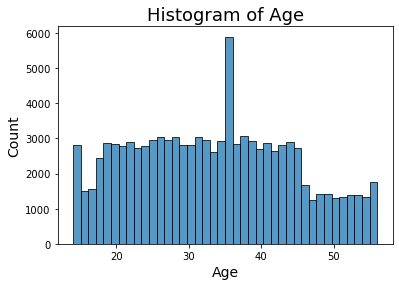

In [47]:
clean_histo(df, 'Age', bins = 40)


<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

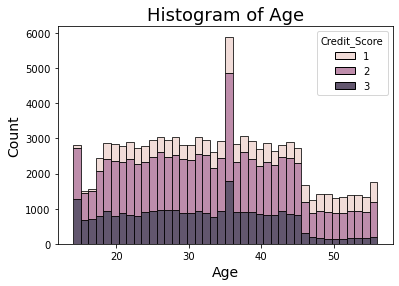

In [48]:
clean_histo(df, 'Age', bins = 40, hue="Credit_Score", multiple="stack")


<h4>Annual income:</h4>

<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

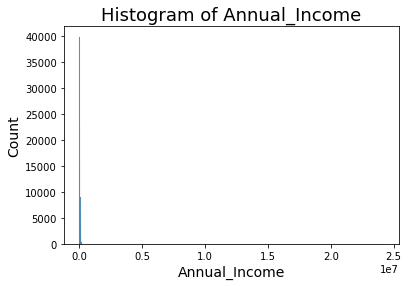

In [49]:
clean_histo(df, 'Annual_Income', bins = 1000 )

<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

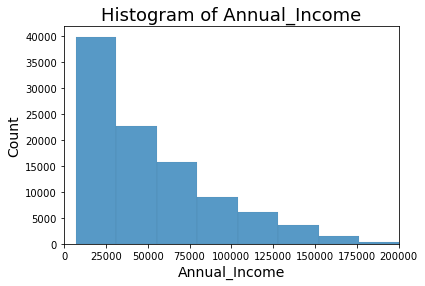

In [50]:
clean_histo(df, 'Annual_Income', bins = 1000, xlim = (0,200000))

<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

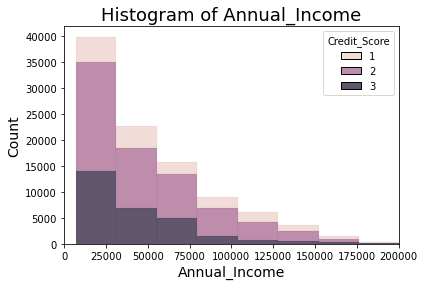

In [51]:
clean_histo(df, 'Annual_Income', bins = 1000, xlim = (0,200000),hue="Credit_Score", multiple="stack" )


<AxesSubplot:title={'center':'Histogram of Monthly_Inhand_Salary'}, xlabel='Monthly_Inhand_Salary', ylabel='Count'>

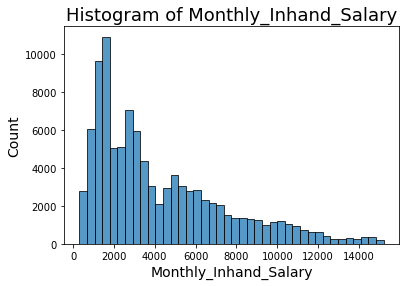

In [52]:
clean_histo(df, 'Monthly_Inhand_Salary', bins = 40)

<AxesSubplot:title={'center':'Histogram of Monthly_Inhand_Salary'}, xlabel='Monthly_Inhand_Salary', ylabel='Count'>

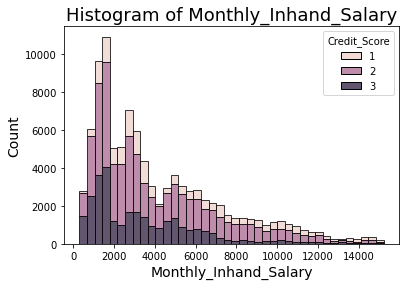

In [53]:
clean_histo(df, 'Monthly_Inhand_Salary', bins = 40,hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

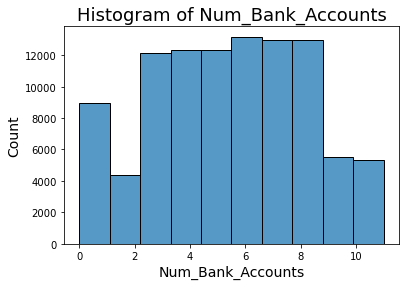

In [54]:
clean_histo(df, 'Num_Bank_Accounts', bins = 10)

<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

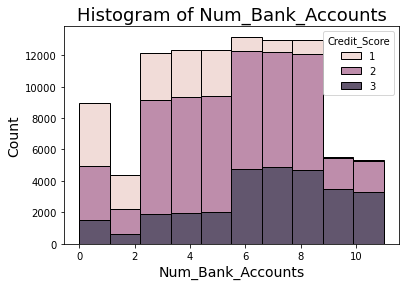

In [55]:
clean_histo(df, 'Num_Bank_Accounts', bins = 10,hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

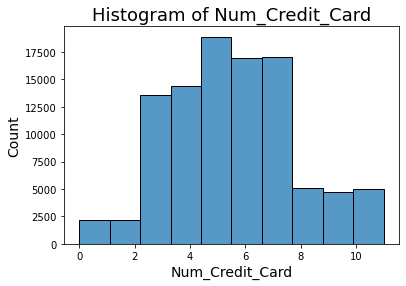

In [56]:
clean_histo(df, 'Num_Credit_Card', bins = 10 )

<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

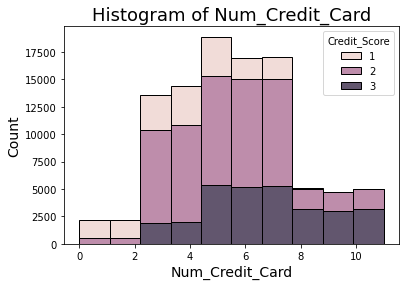

In [57]:
clean_histo(df, 'Num_Credit_Card', bins = 10,hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

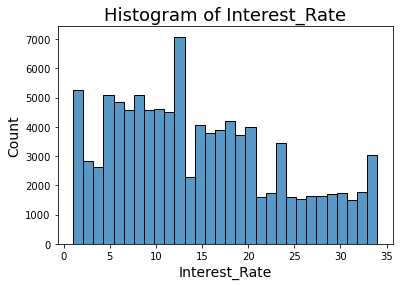

In [58]:
clean_histo(df, 'Interest_Rate', bins = 30 )

<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

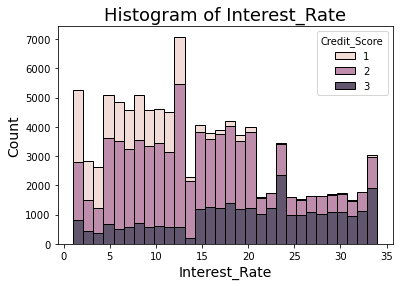

In [59]:
clean_histo(df, 'Interest_Rate', bins = 30, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

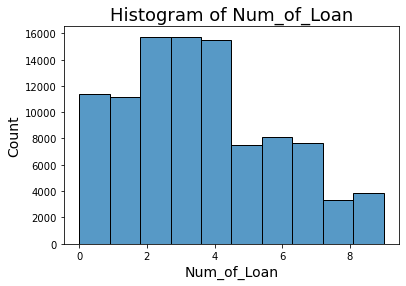

In [60]:
clean_histo(df, 'Num_of_Loan', bins = 10 )

<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

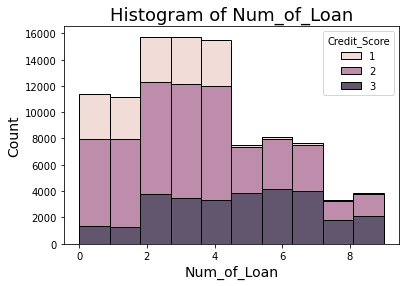

In [61]:
clean_histo(df, 'Num_of_Loan', bins = 10, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Delay_from_due_date'}, xlabel='Delay_from_due_date', ylabel='Count'>

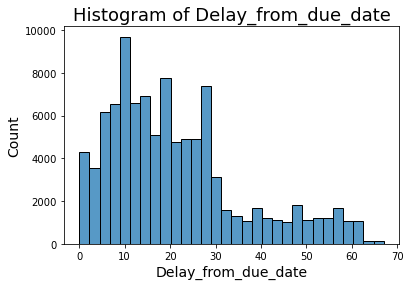

In [62]:
clean_histo(df, 'Delay_from_due_date', bins = 30 )

<AxesSubplot:title={'center':'Histogram of Delay_from_due_date'}, xlabel='Delay_from_due_date', ylabel='Count'>

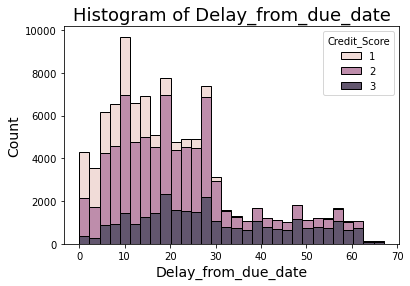

In [63]:
clean_histo(df, 'Delay_from_due_date', bins = 30, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Num_of_Delayed_Payment'}, xlabel='Num_of_Delayed_Payment', ylabel='Count'>

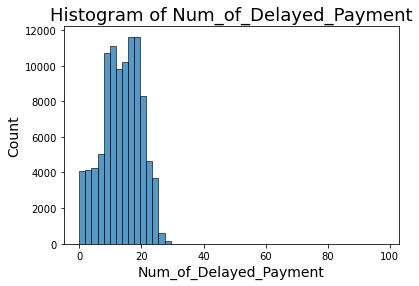

In [64]:
clean_histo(df, 'Num_of_Delayed_Payment', bins = 50 )

<AxesSubplot:title={'center':'Histogram of Num_of_Delayed_Payment'}, xlabel='Num_of_Delayed_Payment', ylabel='Count'>

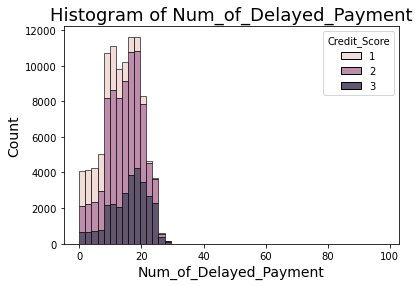

In [65]:
clean_histo(df, 'Num_of_Delayed_Payment', bins = 50, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Num_Credit_Inquiries'}, xlabel='Num_Credit_Inquiries', ylabel='Count'>

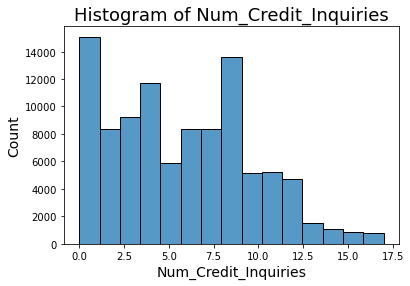

In [66]:
clean_histo(df, 'Num_Credit_Inquiries', bins = 15 )

<AxesSubplot:title={'center':'Histogram of Num_Credit_Inquiries'}, xlabel='Num_Credit_Inquiries', ylabel='Count'>

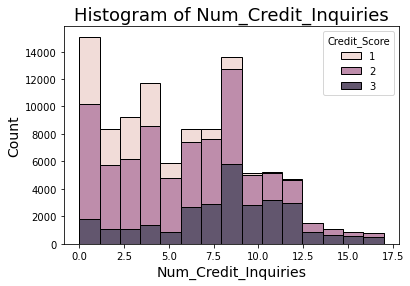

In [67]:
clean_histo(df, 'Num_Credit_Inquiries', bins = 15, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Outstanding_Debt'}, xlabel='Outstanding_Debt', ylabel='Count'>

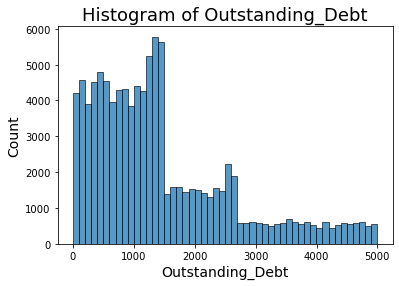

In [68]:
clean_histo(df, 'Outstanding_Debt', bins = 50 )

<AxesSubplot:title={'center':'Histogram of Outstanding_Debt'}, xlabel='Outstanding_Debt', ylabel='Count'>

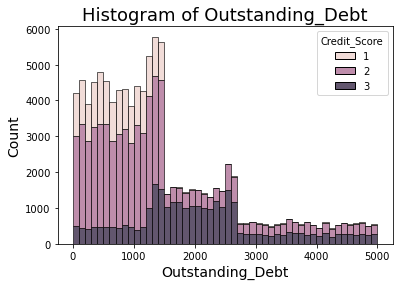

In [69]:
clean_histo(df, 'Outstanding_Debt', bins = 50, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Credit_Utilization_Ratio'}, xlabel='Credit_Utilization_Ratio', ylabel='Count'>

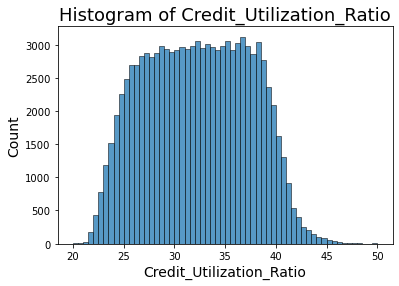

In [70]:
clean_histo(df, 'Credit_Utilization_Ratio', bins = 60 )

<AxesSubplot:title={'center':'Histogram of Credit_Utilization_Ratio'}, xlabel='Credit_Utilization_Ratio', ylabel='Count'>

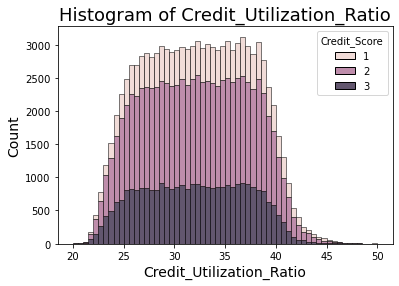

In [71]:
clean_histo(df, 'Credit_Utilization_Ratio', bins = 60, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

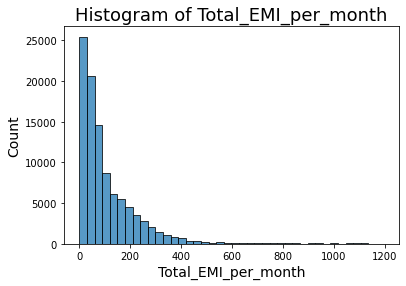

In [72]:
clean_histo(df, 'Total_EMI_per_month', bins = 40 )

<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

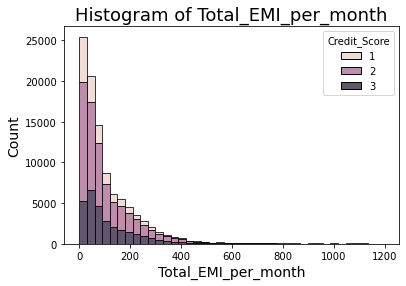

In [73]:
clean_histo(df, 'Total_EMI_per_month', bins = 40 , hue="Credit_Score", multiple="stack" )

<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

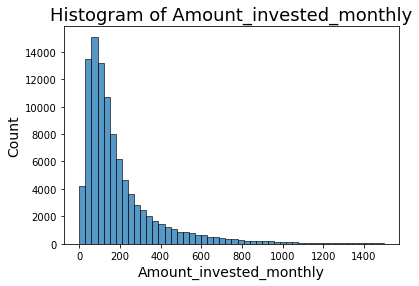

In [74]:
clean_histo(df, 'Amount_invested_monthly', bins = 50 )

<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

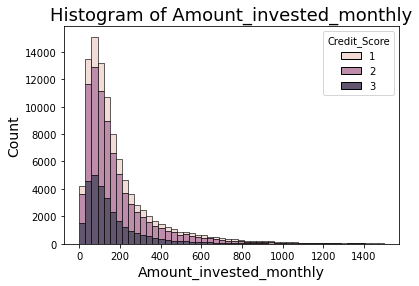

In [75]:
clean_histo(df, 'Amount_invested_monthly', bins = 50, hue="Credit_Score", multiple="stack"  )

<AxesSubplot:title={'center':'Histogram of Monthly_Balance'}, xlabel='Monthly_Balance', ylabel='Count'>

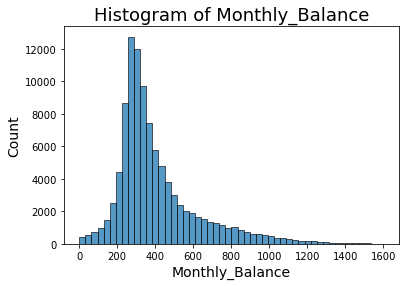

In [76]:
clean_histo(df, 'Monthly_Balance', bins = 50 )

<AxesSubplot:title={'center':'Histogram of Monthly_Balance'}, xlabel='Monthly_Balance', ylabel='Count'>

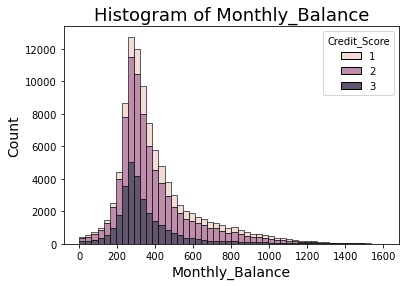

In [77]:
clean_histo(df, 'Monthly_Balance', bins = 50, hue="Credit_Score", multiple="stack" )

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_50000/1576092694.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr_cleaned.corr(), dtype = np.bool)


<AxesSubplot:>

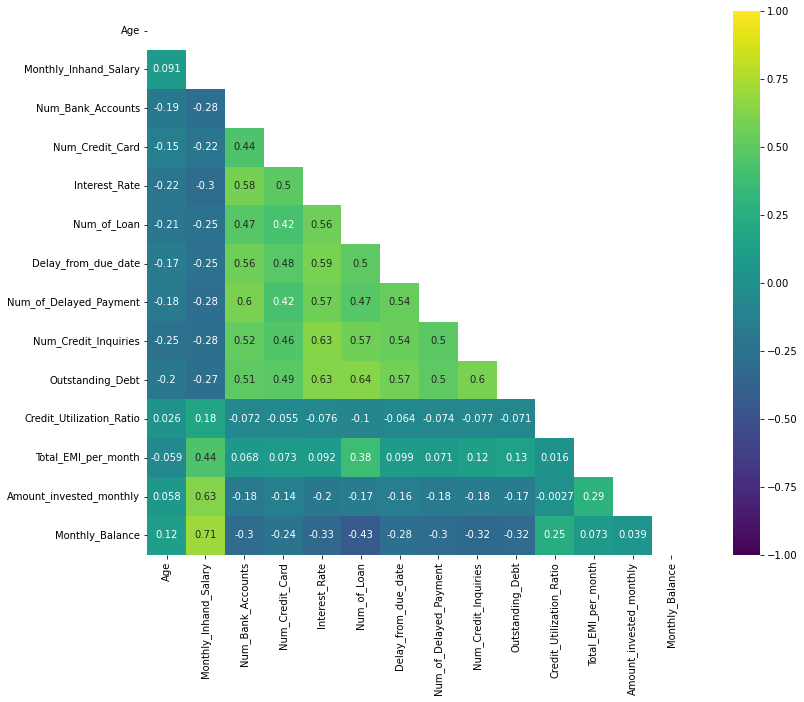

In [78]:
correlation_cols_cleaned = ['Age','Monthly_Inhand_Salary','Num_Bank_Accounts', 
                    'Num_Credit_Card','Interest_Rate','Num_of_Loan',
                    'Delay_from_due_date','Num_of_Delayed_Payment',
                    'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
                    'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

df_corr_cleaned = df[correlation_cols_cleaned]

mask = np.zeros_like(df_corr_cleaned.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.color_palette("viridis", as_cmap = True)
sns.heatmap(df_corr_cleaned.corr(), mask=mask, cmap=cmap, center = 0, square = True, annot=True, vmin = -1, vmax = 1)


<h3> Defining target feature and predictor features: </h3>

In [79]:
data_cols = [c for c in df.columns if ((c != 'ID') and (c != 'Customer_ID') and (c != 'Month') and (c != 'Name') and (c != 'SSN') and (c!= 'Occupation'))]
data = df[data_cols]


target = 'Credit_Score'
features = [c for c in data.columns if c != target]

X = data[features]
y = data[target]

<h3> Data Balancing: </h3>

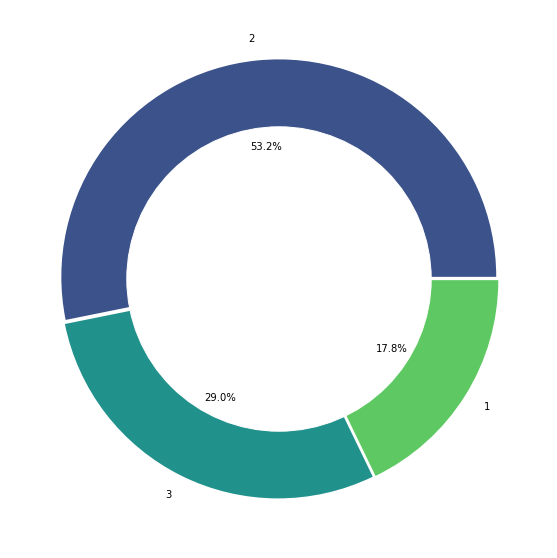

In [80]:
count_pie_chart(df,'Credit_Score')

1    17828
2    17828
3    17828
Name: Credit_Score, dtype: int64


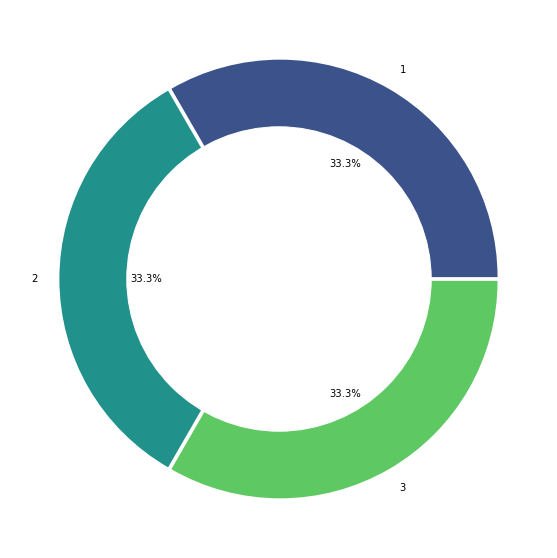

In [81]:
rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)

balanced_counts = y_rus.value_counts()
print(balanced_counts)

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
explode = [0.01]*len(balanced_counts.index)
plt.pie(balanced_counts, labels=list(balanced_counts.index), colors=sns.color_palette("viridis", 3),autopct='%1.1f%%', explode = explode)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<h3> Exploratory data analysis after data balancing:</h3


In [82]:
print (f'Shape of the cleaned data :{X_rus.shape}')

print ('-'*50)

print (X_rus.info())

print ('-'*50)

print (X_rus.describe().T)

Shape of the cleaned data :(53484, 45)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53484 entries, 0 to 53483
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       53484 non-null  int64  
 1   Annual_Income             53484 non-null  float64
 2   Monthly_Inhand_Salary     53484 non-null  float64
 3   Num_Bank_Accounts         53484 non-null  float64
 4   Num_Credit_Card           53484 non-null  float64
 5   Interest_Rate             53484 non-null  float64
 6   Num_of_Loan               53484 non-null  int64  
 7   Delay_from_due_date       53484 non-null  float64
 8   Num_of_Delayed_Payment    53484 non-null  float64
 9   Changed_Credit_Limit      53484 non-null  float64
 10  Num_Credit_Inquiries      53484 non-null  int64  
 11  Credit_Mix                53484 non-null  int64  
 12  Outstanding_Debt          

<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

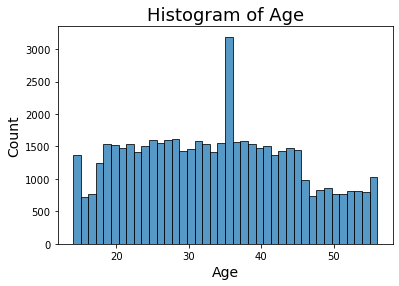

In [83]:
clean_histo(X_rus, 'Age', bins = 40)


<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

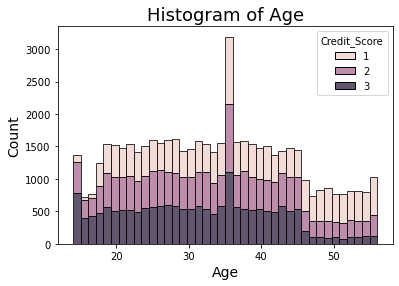

In [84]:
clean_histo(X_rus, 'Age', bins = 40, hue=y_rus, multiple="stack")


<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

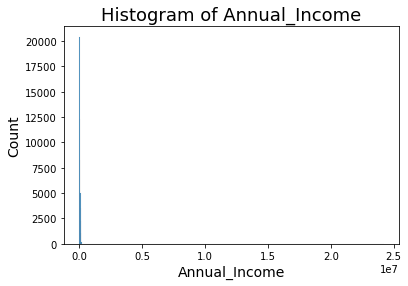

In [85]:
clean_histo(X_rus, 'Annual_Income', bins = 1000 )


<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

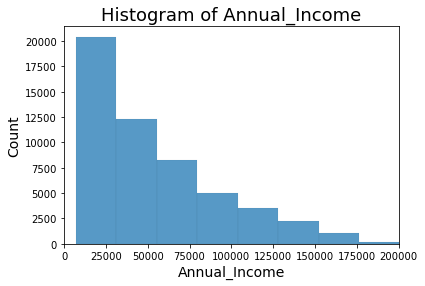

In [86]:
clean_histo(X_rus, 'Annual_Income', bins = 1000, xlim = (0,200000))


<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

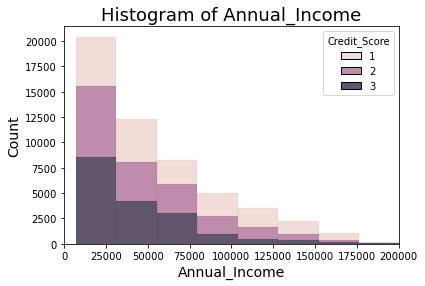

In [87]:
clean_histo(X_rus, 'Annual_Income', bins = 1000, xlim = (0,200000),hue=y_rus, multiple="stack" )


<AxesSubplot:title={'center':'Histogram of Monthly_Inhand_Salary'}, xlabel='Monthly_Inhand_Salary', ylabel='Count'>

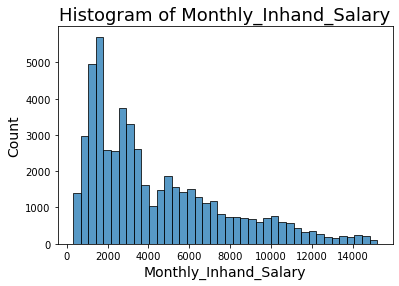

In [88]:
clean_histo(X_rus, 'Monthly_Inhand_Salary', bins = 40)


<AxesSubplot:title={'center':'Histogram of Monthly_Inhand_Salary'}, xlabel='Monthly_Inhand_Salary', ylabel='Count'>

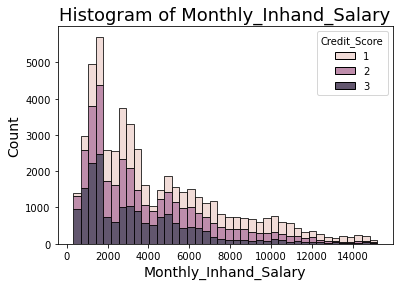

In [89]:
clean_histo(X_rus, 'Monthly_Inhand_Salary', bins = 40,hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

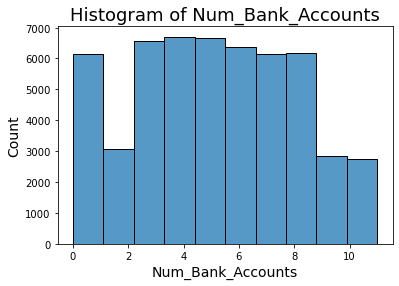

In [90]:
clean_histo(X_rus, 'Num_Bank_Accounts', bins = 10)


<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

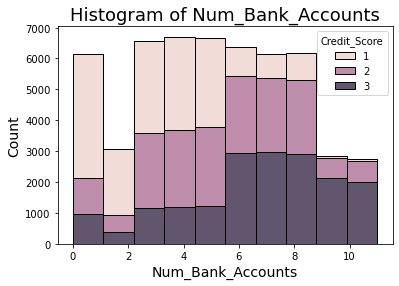

In [91]:
clean_histo(X_rus, 'Num_Bank_Accounts', bins = 10,hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

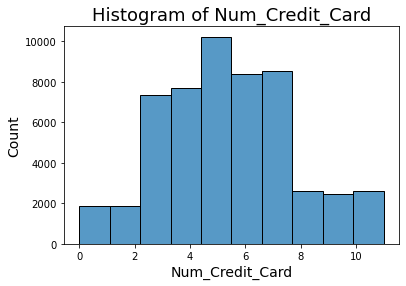

In [92]:
clean_histo(X_rus, 'Num_Credit_Card', bins = 10 )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

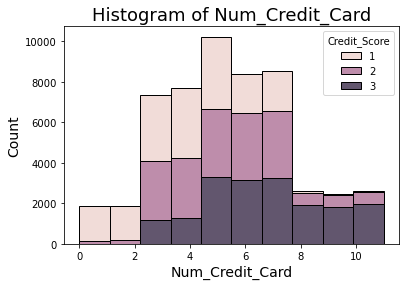

In [93]:
clean_histo(X_rus, 'Num_Credit_Card', bins = 10,hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

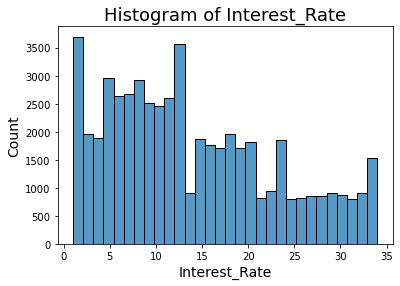

In [94]:
clean_histo(X_rus, 'Interest_Rate', bins = 30 )


<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

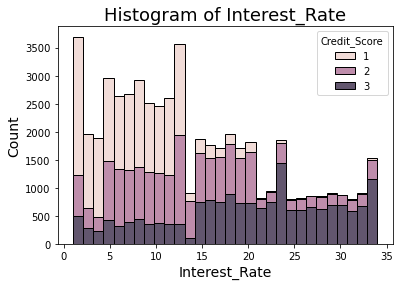

In [95]:
clean_histo(X_rus, 'Interest_Rate', bins = 30, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

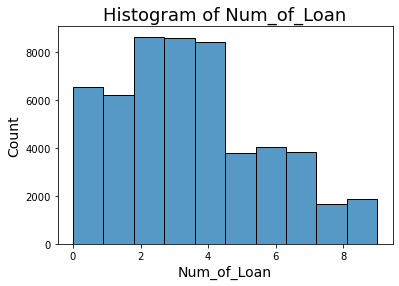

In [96]:
clean_histo(X_rus, 'Num_of_Loan', bins = 10 )


<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

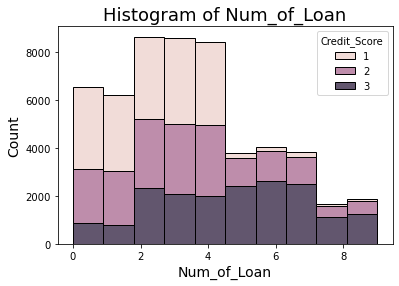

In [97]:
clean_histo(X_rus, 'Num_of_Loan', bins = 10, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Delay_from_due_date'}, xlabel='Delay_from_due_date', ylabel='Count'>

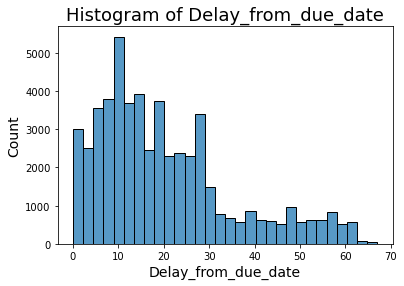

In [98]:
clean_histo(X_rus, 'Delay_from_due_date', bins = 30 )


<AxesSubplot:title={'center':'Histogram of Delay_from_due_date'}, xlabel='Delay_from_due_date', ylabel='Count'>

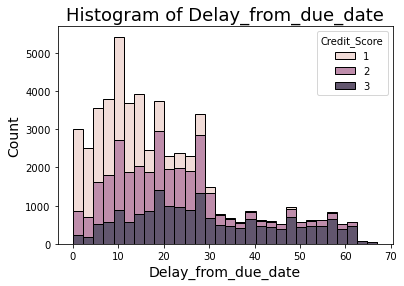

In [99]:
clean_histo(X_rus, 'Delay_from_due_date', bins = 30, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_of_Delayed_Payment'}, xlabel='Num_of_Delayed_Payment', ylabel='Count'>

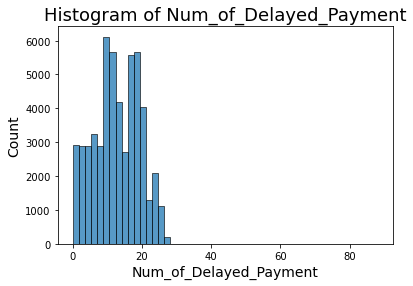

In [100]:
clean_histo(X_rus, 'Num_of_Delayed_Payment', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Num_of_Delayed_Payment'}, xlabel='Num_of_Delayed_Payment', ylabel='Count'>

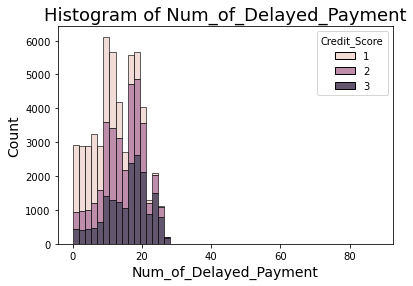

In [101]:
clean_histo(X_rus, 'Num_of_Delayed_Payment', bins = 50, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Inquiries'}, xlabel='Num_Credit_Inquiries', ylabel='Count'>

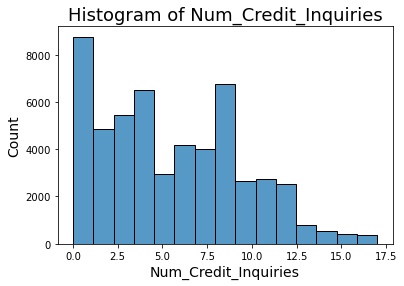

In [102]:
clean_histo(X_rus, 'Num_Credit_Inquiries', bins = 15 )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Inquiries'}, xlabel='Num_Credit_Inquiries', ylabel='Count'>

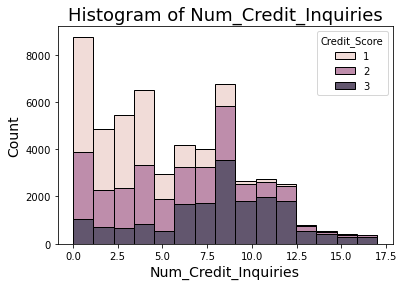

In [103]:
clean_histo(X_rus, 'Num_Credit_Inquiries', bins = 15, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Outstanding_Debt'}, xlabel='Outstanding_Debt', ylabel='Count'>

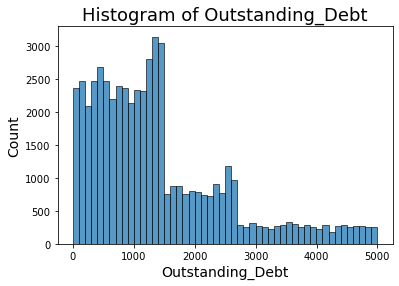

In [104]:
clean_histo(X_rus, 'Outstanding_Debt', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Outstanding_Debt'}, xlabel='Outstanding_Debt', ylabel='Count'>

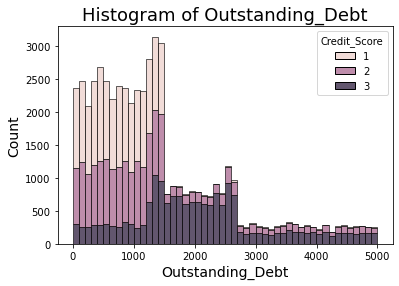

In [105]:
clean_histo(X_rus, 'Outstanding_Debt', bins = 50, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Credit_Utilization_Ratio'}, xlabel='Credit_Utilization_Ratio', ylabel='Count'>

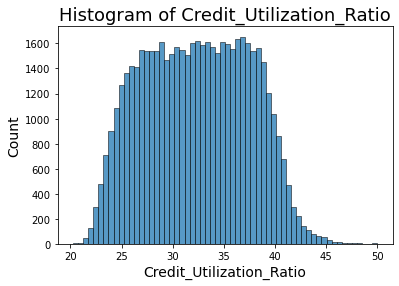

In [106]:
clean_histo(X_rus, 'Credit_Utilization_Ratio', bins = 60 )


<AxesSubplot:title={'center':'Histogram of Credit_Utilization_Ratio'}, xlabel='Credit_Utilization_Ratio', ylabel='Count'>

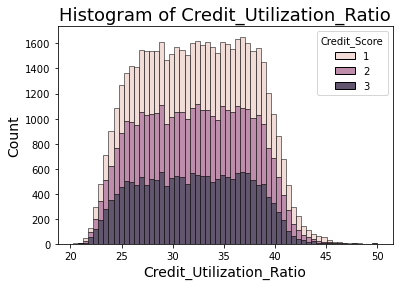

In [107]:
clean_histo(X_rus, 'Credit_Utilization_Ratio', bins = 60, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

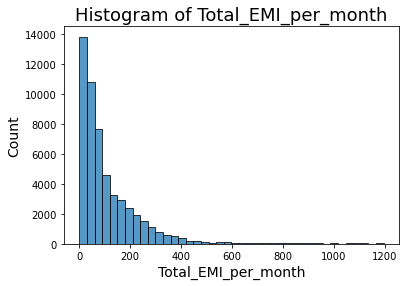

In [108]:
clean_histo(X_rus, 'Total_EMI_per_month', bins = 40 )


<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

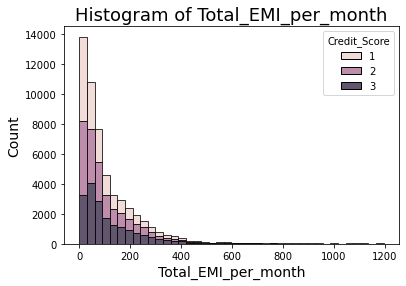

In [109]:
clean_histo(X_rus, 'Total_EMI_per_month', bins = 40 , hue=y_rus, multiple="stack" )


<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

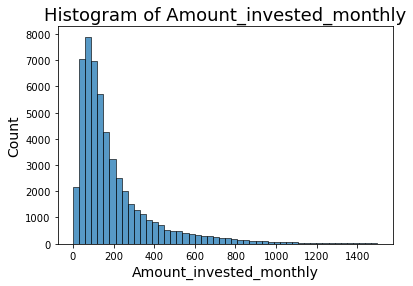

In [110]:
clean_histo(X_rus, 'Amount_invested_monthly', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

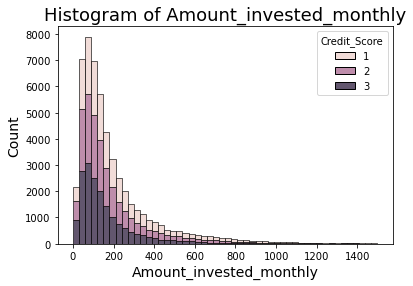

In [111]:
clean_histo(X_rus, 'Amount_invested_monthly', bins = 50, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Monthly_Balance'}, xlabel='Monthly_Balance', ylabel='Count'>

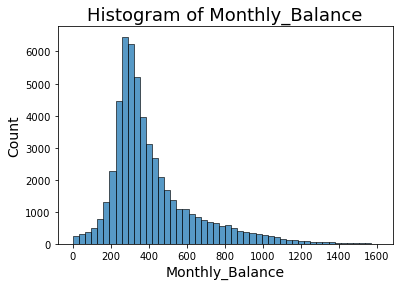

In [112]:
clean_histo(X_rus, 'Monthly_Balance', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Monthly_Balance'}, xlabel='Monthly_Balance', ylabel='Count'>

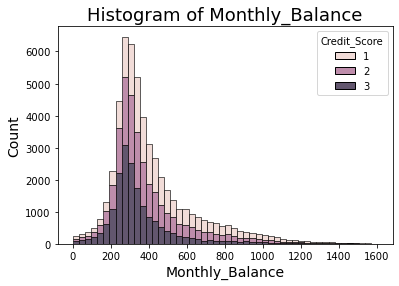

In [113]:
clean_histo(X_rus, 'Monthly_Balance', bins = 50, hue=y_rus, multiple="stack" )

/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_50000/3359779718.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr_cleaned_rus.corr(), dtype = np.bool)


<AxesSubplot:>

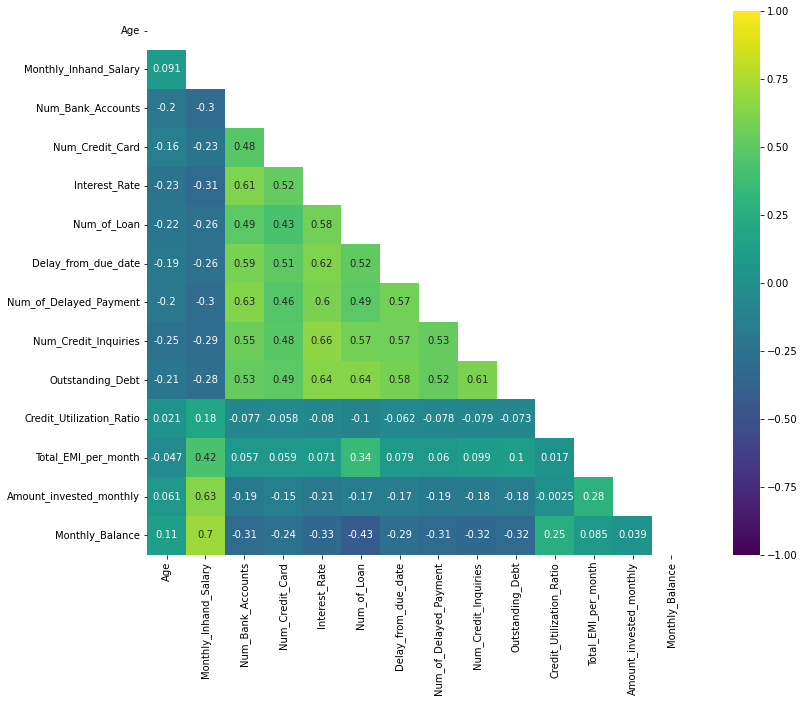

In [114]:
correlation_cols_cleaned = ['Age','Monthly_Inhand_Salary','Num_Bank_Accounts', 
                    'Num_Credit_Card','Interest_Rate','Num_of_Loan',
                    'Delay_from_due_date','Num_of_Delayed_Payment',
                    'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
                    'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

df_corr_cleaned_rus = X_rus[correlation_cols_cleaned]

mask = np.zeros_like(df_corr_cleaned_rus.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.color_palette("viridis", as_cmap = True)
sns.heatmap(df_corr_cleaned_rus.corr(), mask=mask, cmap=cmap, center = 0, square = True, annot=True, vmin = -1, vmax = 1)


<h3>Data transformation of under sampled data: </h3>

In [115]:
yj_scaler = PowerTransformer(method = 'yeo-johnson')
Xyj = yj_scaler.fit_transform(X_rus)


In [116]:
ss = StandardScaler()
ss.fit(X_rus)
X_ss = ss.transform(X_rus)

<h3> Preparation of training and testing data </h3>

In [117]:
Xyj_train, Xyj_test, yyj_train, yyj_test = train_test_split(Xyj, y_rus, random_state =42, test_size = 0.2)


<h3>Modelling: </h3>

In [118]:
#Supporting finction:
def modelling(models, X, y, test_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, test_size = test_size)
    for m in models:
        start = time.time()
        m.fit(X_train, y_train)
        print (f'{m} Model:')
        print(f'Accuracy of Training data : {m.score(X_train, y_train)}')
        print(f'Accuracy of Test data : {m.score(X_test, y_test)}')
        stop = time.time()
        elapsed_time = stop - start
        print ('Execution time:', elapsed_time, 'seconds')
        print ('-'*50)
        

<h4>Modelling of Yeo-Jhonson scaled data</h4>

In [119]:
knnyj_rus = KNeighborsClassifier(n_neighbors=15)
ldayj_rus = LinearDiscriminantAnalysis()
logryj_rus = LogisticRegression(max_iter=1000, multi_class='multinomial')
nbyj_rus = GaussianNB()
dtyj_rus = DecisionTreeClassifier(random_state=0, max_depth=5)
rfyj_rus = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200)
gbmyj_rus = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
ncyj_rus = NearestCentroid()
qdayj_rus = QuadraticDiscriminantAnalysis()
etcyj_rus = ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=5)
lgbm_rus_yj = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
models_rus_yj = [knnyj_rus,ldayj_rus,logryj_rus,nbyj_rus,dtyj_rus,rfyj_rus,
                 gbmyj_rus, ncyj_rus, qdayj_rus,etcyj_rus, lgbm_rus_yj]

In [120]:
modelling(models_rus_yj,Xyj, y_rus, 0.2, 42)

KNeighborsClassifier(n_neighbors=15) Model:
Accuracy of Training data : 0.7360413209619744
Accuracy of Test data : 0.7001028325698794
Execution time: 9.612491846084595 seconds
--------------------------------------------------
LinearDiscriminantAnalysis() Model:
Accuracy of Training data : 0.6938322387641106
Accuracy of Test data : 0.6910348695896046
Execution time: 0.5705909729003906 seconds
--------------------------------------------------
LogisticRegression(max_iter=1000, multi_class='multinomial') Model:
Accuracy of Training data : 0.6963797415102718
Accuracy of Test data : 0.6956155931569599
Execution time: 0.6222269535064697 seconds
--------------------------------------------------
GaussianNB() Model:
Accuracy of Training data : 0.6831514244980952
Accuracy of Test data : 0.6830887164625596
Execution time: 0.14240312576293945 seconds
--------------------------------------------------
DecisionTreeClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7297543

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() Model:
Accuracy of Training data : 0.4873209152312618
Accuracy of Test data : 0.47471253622510984
Execution time: 0.3754570484161377 seconds
--------------------------------------------------
ExtraTreesClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7151237525416598
Accuracy of Test data : 0.7123492568009723
Execution time: 2.9130208492279053 seconds
--------------------------------------------------
LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.9221258793558791
Accuracy of Test data : 0.7778816490604843
Execution time: 1.6126909255981445 seconds
--------------------------------------------------


<h4>Modelling of un-scaled data:</h4>

In [121]:
knnn = KNeighborsClassifier(n_neighbors=15)
ldan = LinearDiscriminantAnalysis()
logrn = LogisticRegression(multi_class='multinomial', max_iter = 1000, solver= 'lbfgs')
nbn = GaussianNB()
dtn = DecisionTreeClassifier(random_state=0, max_depth=5)
rfn = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200)
gbmn = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
ncn = NearestCentroid()
qdan = QuadraticDiscriminantAnalysis()
etcn = ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=5)
lgbmn = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)

In [122]:
models_n = [knnn,ldan,logrn,nbn,dtn,rfn,gbmn,ncn,qdan,etcn,lgbmn]

In [123]:
modelling(models_n, X_rus, y_rus, 0.2, 42)

KNeighborsClassifier(n_neighbors=15) Model:
Accuracy of Training data : 0.672353752307944
Accuracy of Test data : 0.6193325231373282
Execution time: 9.418779134750366 seconds
--------------------------------------------------
LinearDiscriminantAnalysis() Model:
Accuracy of Training data : 0.6927571458620609
Accuracy of Test data : 0.6914088062073479
Execution time: 0.7148160934448242 seconds
--------------------------------------------------
LogisticRegression(max_iter=1000, multi_class='multinomial') Model:
Accuracy of Training data : 0.5368920466496833
Accuracy of Test data : 0.5347293633729083
Execution time: 2.096398115158081 seconds
--------------------------------------------------
GaussianNB() Model:
Accuracy of Training data : 0.4773412485100615
Accuracy of Test data : 0.4721884640553426
Execution time: 0.1307370662689209 seconds
--------------------------------------------------
DecisionTreeClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7297543646

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() Model:
Accuracy of Training data : 0.3469979199289504
Accuracy of Test data : 0.34430214078713656
Execution time: 0.38103604316711426 seconds
--------------------------------------------------
ExtraTreesClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7147731787692524
Accuracy of Test data : 0.7118818360287931
Execution time: 1.9756271839141846 seconds
--------------------------------------------------
LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.922663425806904
Accuracy of Test data : 0.7797513321492007
Execution time: 1.5746490955352783 seconds
--------------------------------------------------


<h4>Modelling of standard-scaled data:</h4>

In [124]:
knns = KNeighborsClassifier(n_neighbors=15)
ldas = LinearDiscriminantAnalysis()
logrs = LogisticRegression(multi_class='multinomial', max_iter = 1000, solver= 'lbfgs')
nbs = GaussianNB()
dts = DecisionTreeClassifier(random_state=0, max_depth=5)
rfs = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200)
gbms = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
ncs = NearestCentroid()
qdas = QuadraticDiscriminantAnalysis()
etcs = ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=5)
lgbms = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)

models_s = [knns,ldas,logrs,nbs,dts,rfs,gbms,ncs,qdas,etcs,lgbms]

In [125]:
modelling(models_s, X_ss, y_rus, 0.2, 42)

KNeighborsClassifier(n_neighbors=15) Model:
Accuracy of Training data : 0.7349662280599247
Accuracy of Test data : 0.6949612040759091
Execution time: 9.527583122253418 seconds
--------------------------------------------------
LinearDiscriminantAnalysis() Model:
Accuracy of Training data : 0.6927571458620609
Accuracy of Test data : 0.6914088062073479
Execution time: 0.4330577850341797 seconds
--------------------------------------------------
LogisticRegression(max_iter=1000, multi_class='multinomial') Model:
Accuracy of Training data : 0.6960291677378643
Accuracy of Test data : 0.6917827428250911
Execution time: 0.4833059310913086 seconds
--------------------------------------------------
GaussianNB() Model:
Accuracy of Training data : 0.685348353471849
Accuracy of Test data : 0.6842105263157895
Execution time: 0.12687206268310547 seconds
--------------------------------------------------
DecisionTreeClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.72975436

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() Model:
Accuracy of Training data : 0.5253698553298899
Accuracy of Test data : 0.5208002243619706
Execution time: 0.3276989459991455 seconds
--------------------------------------------------
ExtraTreesClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7147731787692524
Accuracy of Test data : 0.7118818360287931
Execution time: 2.8855671882629395 seconds
--------------------------------------------------
LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.9217285624138173
Accuracy of Test data : 0.7765728708983827
Execution time: 1.5540471076965332 seconds
--------------------------------------------------


<h3> Balancing using SMOTE </h3>

Balanced sample counts:
1    53174
2    53174
3    53174
Name: Credit_Score, dtype: int64


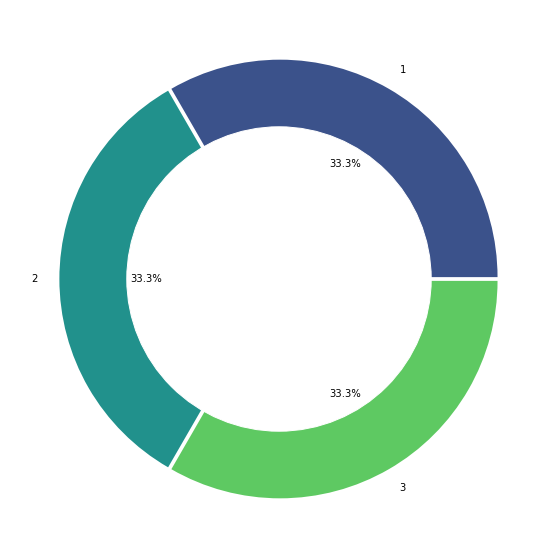

In [126]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
counts = y_sm.value_counts()
print ('Balanced sample counts:')
print (counts)
bal_counts = y_sm.value_counts(normalize = True)*100
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
explode = [0.01]*len(counts.index)
plt.pie(bal_counts, labels=list(counts.index), colors=sns.color_palette("viridis", 3),autopct='%1.1f%%', explode = explode)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<h3>Exploratory Data Analysis after SMOTE:</h3>

<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

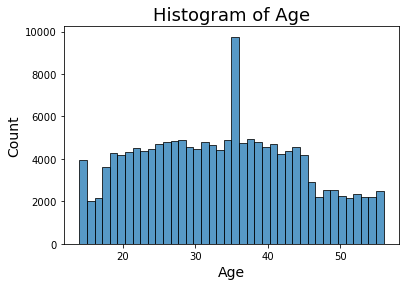

In [127]:
clean_histo(X_sm, 'Age', bins = 40)


<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

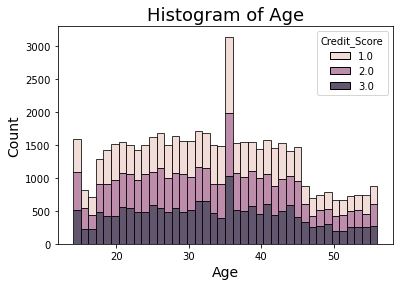

In [128]:
clean_histo(X_sm, 'Age', bins = 40, hue=y_rus, multiple="stack")


<AxesSubplot:title={'center':'Histogram of Annual_Income'}, xlabel='Annual_Income', ylabel='Count'>

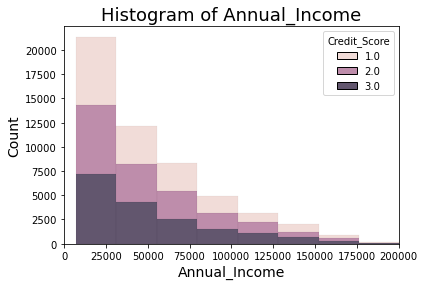

In [129]:
clean_histo(X_sm, 'Annual_Income', bins = 1000, xlim = (0,200000),hue=y_rus, multiple="stack" )


<AxesSubplot:title={'center':'Histogram of Monthly_Inhand_Salary'}, xlabel='Monthly_Inhand_Salary', ylabel='Count'>

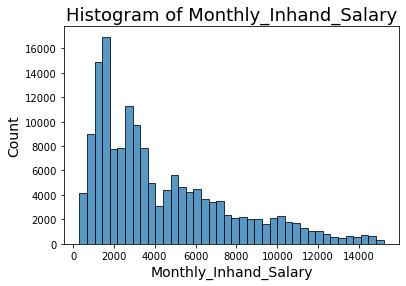

In [130]:
clean_histo(X_sm, 'Monthly_Inhand_Salary', bins = 40)


<AxesSubplot:title={'center':'Histogram of Monthly_Inhand_Salary'}, xlabel='Monthly_Inhand_Salary', ylabel='Count'>

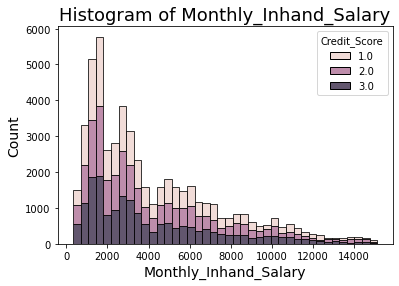

In [131]:
clean_histo(X_sm, 'Monthly_Inhand_Salary', bins = 40,hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

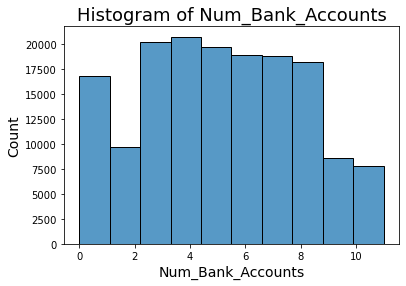

In [132]:
clean_histo(X_sm, 'Num_Bank_Accounts', bins = 10)


<AxesSubplot:title={'center':'Histogram of Num_Bank_Accounts'}, xlabel='Num_Bank_Accounts', ylabel='Count'>

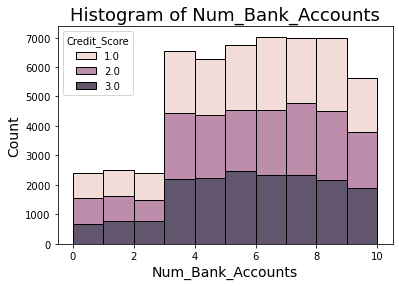

In [133]:
clean_histo(X_sm, 'Num_Bank_Accounts', bins = 10,hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

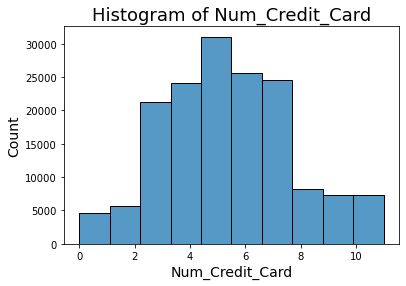

In [134]:
clean_histo(X_sm, 'Num_Credit_Card', bins = 10 )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Card'}, xlabel='Num_Credit_Card', ylabel='Count'>

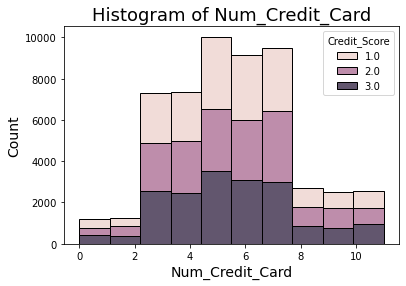

In [135]:
clean_histo(X_sm, 'Num_Credit_Card', bins = 10,hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

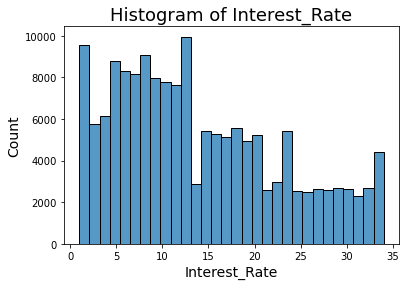

In [136]:
clean_histo(X_sm, 'Interest_Rate', bins = 30 )


<AxesSubplot:title={'center':'Histogram of Interest_Rate'}, xlabel='Interest_Rate', ylabel='Count'>

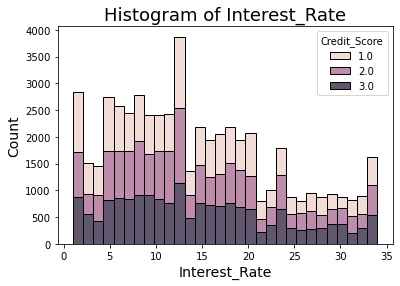

In [137]:
clean_histo(X_sm, 'Interest_Rate', bins = 30, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

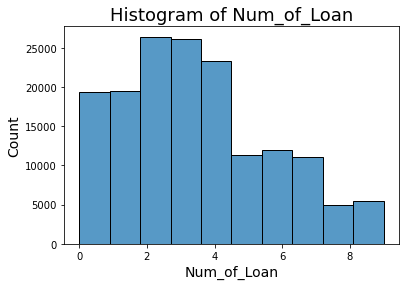

In [138]:
clean_histo(X_sm, 'Num_of_Loan', bins = 10 )


<AxesSubplot:title={'center':'Histogram of Num_of_Loan'}, xlabel='Num_of_Loan', ylabel='Count'>

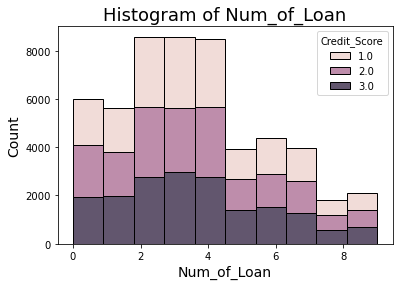

In [139]:
clean_histo(X_sm, 'Num_of_Loan', bins = 10, hue=y_rus, multiple="stack")


<AxesSubplot:title={'center':'Histogram of Delay_from_due_date'}, xlabel='Delay_from_due_date', ylabel='Count'>

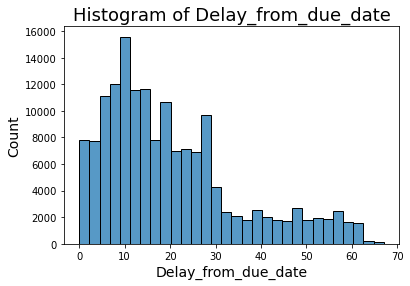

In [140]:
clean_histo(X_sm, 'Delay_from_due_date', bins = 30 )


<AxesSubplot:title={'center':'Histogram of Delay_from_due_date'}, xlabel='Delay_from_due_date', ylabel='Count'>

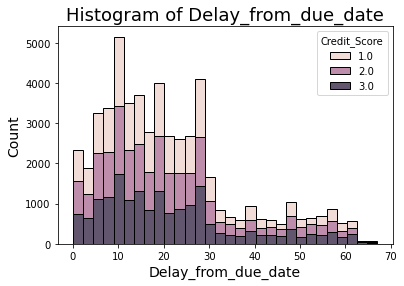

In [141]:
clean_histo(X_sm, 'Delay_from_due_date', bins = 30, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_of_Delayed_Payment'}, xlabel='Num_of_Delayed_Payment', ylabel='Count'>

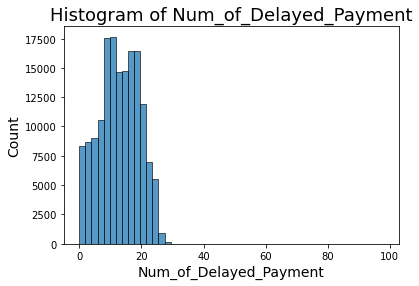

In [142]:
clean_histo(X_sm, 'Num_of_Delayed_Payment', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Num_of_Delayed_Payment'}, xlabel='Num_of_Delayed_Payment', ylabel='Count'>

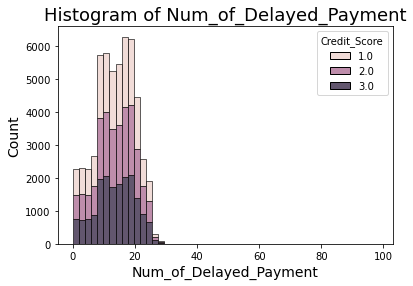

In [143]:
clean_histo(X_sm, 'Num_of_Delayed_Payment', bins = 50, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Inquiries'}, xlabel='Num_Credit_Inquiries', ylabel='Count'>

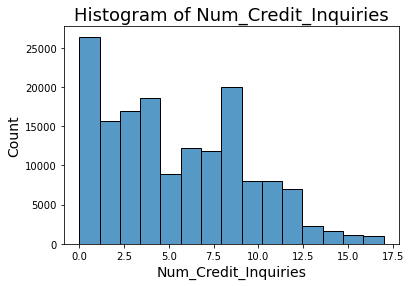

In [144]:
clean_histo(X_sm, 'Num_Credit_Inquiries', bins = 15 )


<AxesSubplot:title={'center':'Histogram of Num_Credit_Inquiries'}, xlabel='Num_Credit_Inquiries', ylabel='Count'>

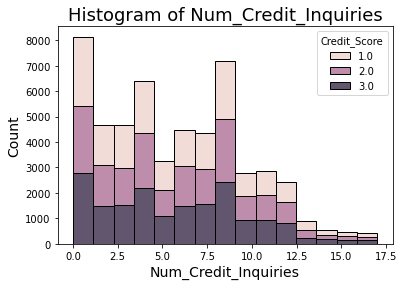

In [145]:
clean_histo(X_sm, 'Num_Credit_Inquiries', bins = 15, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Outstanding_Debt'}, xlabel='Outstanding_Debt', ylabel='Count'>

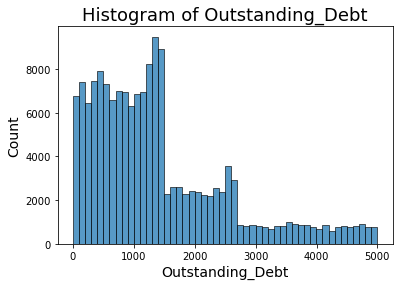

In [146]:
clean_histo(X_sm, 'Outstanding_Debt', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Outstanding_Debt'}, xlabel='Outstanding_Debt', ylabel='Count'>

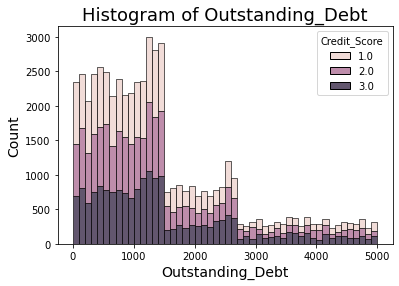

In [147]:
clean_histo(X_sm, 'Outstanding_Debt', bins = 50, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Credit_Utilization_Ratio'}, xlabel='Credit_Utilization_Ratio', ylabel='Count'>

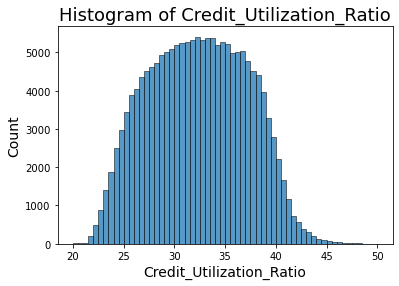

In [148]:
clean_histo(X_sm, 'Credit_Utilization_Ratio', bins = 60 )


<AxesSubplot:title={'center':'Histogram of Credit_Utilization_Ratio'}, xlabel='Credit_Utilization_Ratio', ylabel='Count'>

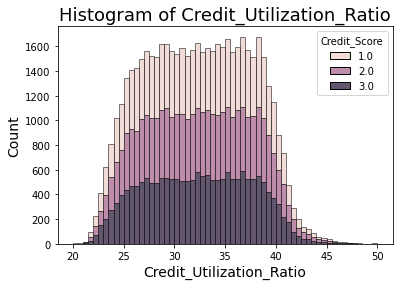

In [149]:
clean_histo(X_sm, 'Credit_Utilization_Ratio', bins = 60, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

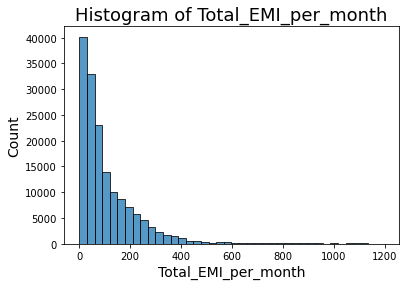

In [150]:
clean_histo(X_sm, 'Total_EMI_per_month', bins = 40 )


<AxesSubplot:title={'center':'Histogram of Total_EMI_per_month'}, xlabel='Total_EMI_per_month', ylabel='Count'>

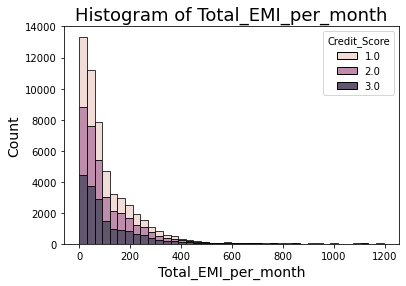

In [151]:
clean_histo(X_sm, 'Total_EMI_per_month', bins = 40 , hue=y_rus, multiple="stack" )


<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

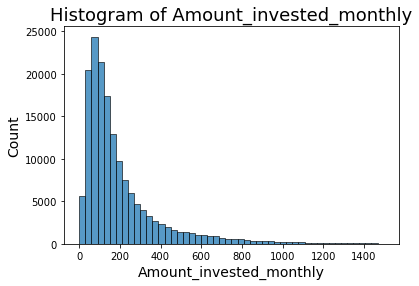

In [152]:
clean_histo(X_sm, 'Amount_invested_monthly', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Amount_invested_monthly'}, xlabel='Amount_invested_monthly', ylabel='Count'>

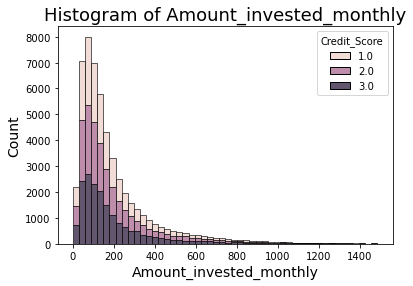

In [153]:
clean_histo(X_sm, 'Amount_invested_monthly', bins = 50, hue=y_rus, multiple="stack"  )


<AxesSubplot:title={'center':'Histogram of Monthly_Balance'}, xlabel='Monthly_Balance', ylabel='Count'>

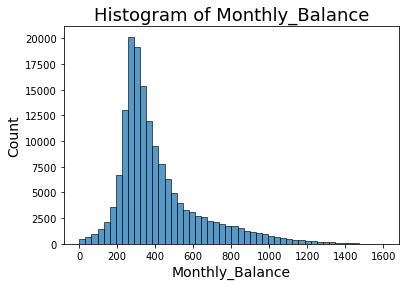

In [154]:
clean_histo(X_sm, 'Monthly_Balance', bins = 50 )


<AxesSubplot:title={'center':'Histogram of Monthly_Balance'}, xlabel='Monthly_Balance', ylabel='Count'>

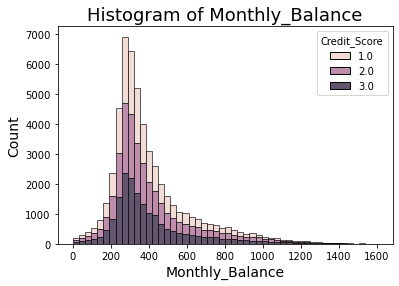

In [155]:
clean_histo(X_sm, 'Monthly_Balance', bins = 50, hue=y_rus, multiple="stack" )


/var/folders/3q/rmzxschd5zj38nbjzwh53z380000gn/T/ipykernel_50000/2116636446.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr_cleaned_rus.corr(), dtype = np.bool)


<AxesSubplot:>

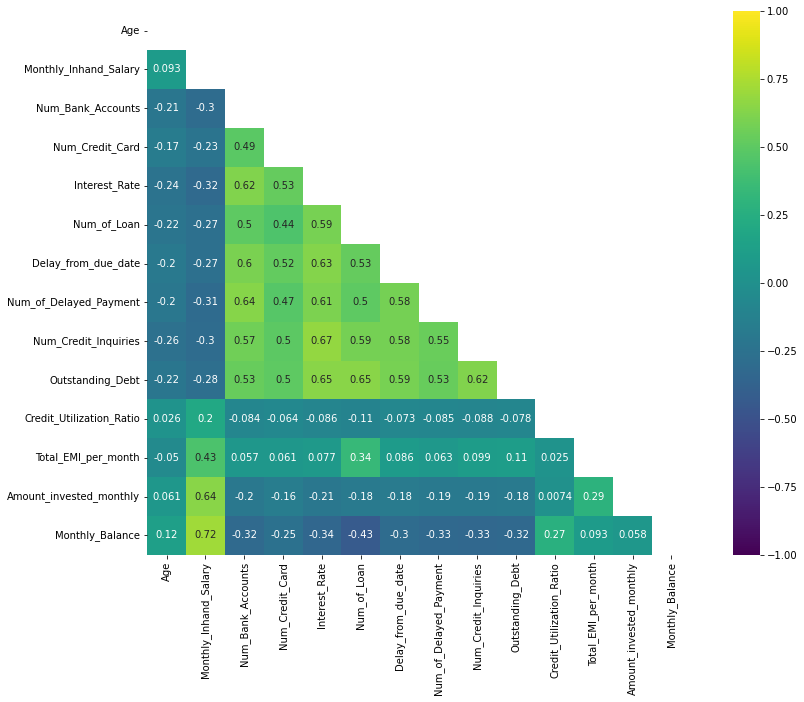

In [156]:
correlation_cols_cleaned = ['Age','Monthly_Inhand_Salary','Num_Bank_Accounts', 
                    'Num_Credit_Card','Interest_Rate','Num_of_Loan',
                    'Delay_from_due_date','Num_of_Delayed_Payment',
                    'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio',
                    'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

df_corr_cleaned_rus = X_sm[correlation_cols_cleaned]

mask = np.zeros_like(df_corr_cleaned_rus.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,10))
cmap = sns.color_palette("viridis", as_cmap = True)
sns.heatmap(df_corr_cleaned_rus.corr(), mask=mask, cmap=cmap, center = 0, square = True, annot=True, vmin = -1, vmax = 1)


<h3>Modelling of SMOTE balanced data:</h3>

<h4>Modelling of un-scaled data:</h4>

In [157]:
knn_sm = KNeighborsClassifier(n_neighbors=15)
lda_sm = LinearDiscriminantAnalysis()
logr_sm = LogisticRegression(multi_class='multinomial', max_iter = 1000, solver= 'lbfgs')
nb_sm = GaussianNB()
dt_sm = DecisionTreeClassifier(random_state=0, max_depth=5)
rf_sm = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200)
gbm_sm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
nc_sm = NearestCentroid()
qda_sm = QuadraticDiscriminantAnalysis()
etc_sm = ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=5)
lgbms_sm = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)

models_sm = [knn_sm,lda_sm,logr_sm,nb_sm,dt_sm,rf_sm,gbm_sm,
                nc_sm,qda_sm,etc_sm, lgbms_sm]


In [158]:
modelling(models_sm, X_sm, y_sm, 0.2, 42)

KNeighborsClassifier(n_neighbors=15) Model:
Accuracy of Training data : 0.7816356754977785
Accuracy of Test data : 0.7454317505093245
Execution time: 73.80638980865479 seconds
--------------------------------------------------
LinearDiscriminantAnalysis() Model:
Accuracy of Training data : 0.7136431666627487
Accuracy of Test data : 0.7156245102648487
Execution time: 1.5310359001159668 seconds
--------------------------------------------------
LogisticRegression(max_iter=1000, multi_class='multinomial') Model:
Accuracy of Training data : 0.5077066535022764
Accuracy of Test data : 0.5041529540824322
Execution time: 4.0256359577178955 seconds
--------------------------------------------------
GaussianNB() Model:
Accuracy of Training data : 0.4655806044649224
Accuracy of Test data : 0.45970850963798776
Execution time: 0.4346168041229248 seconds
--------------------------------------------------
DecisionTreeClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7278262

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() Model:
Accuracy of Training data : 0.39000289930024995
Accuracy of Test data : 0.38862247296661967
Execution time: 1.3049468994140625 seconds
--------------------------------------------------
ExtraTreesClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7183368986890462
Accuracy of Test data : 0.7201379094185865
Execution time: 7.669377088546753 seconds
--------------------------------------------------
LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.8425523245335653
Accuracy of Test data : 0.8146058611502899
Execution time: 5.318072080612183 seconds
--------------------------------------------------


<h4>Modelling of standard-scaled data:</h4>

In [159]:
ss_sm = StandardScaler()
ss_sm.fit(X_sm)
X_sm_ss = ss.transform(X_sm)

In [160]:
knn_sm_ss = KNeighborsClassifier(n_neighbors=15)
lda_sm_ss = LinearDiscriminantAnalysis()
logr_sm_ss = LogisticRegression(multi_class='multinomial', max_iter = 1000, solver= 'lbfgs')
nb_sm_ss = GaussianNB()
dt_sm_ss = DecisionTreeClassifier(random_state=0, max_depth=5)
rf_sm_ss = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200)
gbm_sm_ss = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                 max_depth=5, random_state=0)
nc_sm_ss = NearestCentroid()
qda_sm_ss = QuadraticDiscriminantAnalysis()
etc_sm_ss = ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=5)
lgbms_sm_ss = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)

models_sm_ss = [knn_sm_ss,lda_sm_ss,logr_sm_ss,nb_sm_ss,dt_sm_ss,rf_sm_ss,gbm_sm_ss,
                nc_sm_ss,qda_sm_ss,etc_sm_ss,lgbms_sm_ss]

In [161]:
modelling(models_sm_ss, X_sm_ss, y_sm, 0.2, 42)

KNeighborsClassifier(n_neighbors=15) Model:
Accuracy of Training data : 0.8170228104406153
Accuracy of Test data : 0.7896567936060178
Execution time: 83.48995018005371 seconds
--------------------------------------------------
LinearDiscriminantAnalysis() Model:
Accuracy of Training data : 0.7136431666627487
Accuracy of Test data : 0.7156245102648487
Execution time: 1.9438660144805908 seconds
--------------------------------------------------
LogisticRegression(max_iter=1000, multi_class='multinomial') Model:
Accuracy of Training data : 0.7134551039438319
Accuracy of Test data : 0.7160946560100298
Execution time: 3.358567953109741 seconds
--------------------------------------------------
GaussianNB() Model:
Accuracy of Training data : 0.6985119537365712
Accuracy of Test data : 0.6999529854254819
Execution time: 0.49012088775634766 seconds
--------------------------------------------------
DecisionTreeClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.72782623

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() Model:
Accuracy of Training data : 0.43480100613554623
Accuracy of Test data : 0.4337251214543175
Execution time: 1.2854759693145752 seconds
--------------------------------------------------
ExtraTreesClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7183368986890462
Accuracy of Test data : 0.7201379094185865
Execution time: 12.270718812942505 seconds
--------------------------------------------------
LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.8616171826637516
Accuracy of Test data : 0.8273624823695346
Execution time: 5.43425989151001 seconds
--------------------------------------------------


<h4>Modelling of Yeo-Jhonson scaled data:</h4>

In [162]:
yj_sm = PowerTransformer(method = 'yeo-johnson')
Xyj_sm = yj_sm.fit_transform(X_sm)

In [163]:
knn_sm_yj = KNeighborsClassifier(n_neighbors=15)
lda_sm_yj = LinearDiscriminantAnalysis()
logr_sm_yj = LogisticRegression(multi_class='multinomial', max_iter = 1000, solver= 'lbfgs')
nb_sm_yj = GaussianNB()
dt_sm_yj = DecisionTreeClassifier(random_state=0, max_depth=5)
rf_sm_yj = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=200)
gbm_sm_yj = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
nc_sm_yj = NearestCentroid()
qda_sm_yj = QuadraticDiscriminantAnalysis()
etc_sm_yj = ExtraTreesClassifier(n_estimators=100, random_state=0, max_depth=5)
lgbms_sm_yj = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)


models_sm_yj = [knn_sm_yj,lda_sm_yj,logr_sm_yj,nb_sm_yj,dt_sm_yj,rf_sm_yj,gbm_sm_yj,
                nc_sm_yj,qda_sm_yj,etc_sm_yj, lgbms_sm_yj]

In [164]:
modelling(models_sm_yj, Xyj_sm, y_sm, 0.2, 42)

KNeighborsClassifier(n_neighbors=15) Model:
Accuracy of Training data : 0.8196243447189637
Accuracy of Test data : 0.7905343989970224
Execution time: 85.43537712097168 seconds
--------------------------------------------------
LinearDiscriminantAnalysis() Model:
Accuracy of Training data : 0.713588315036398
Accuracy of Test data : 0.7165961448048895
Execution time: 2.218196153640747 seconds
--------------------------------------------------
LogisticRegression(max_iter=1000, multi_class='multinomial') Model:
Accuracy of Training data : 0.7135804790897764
Accuracy of Test data : 0.7158125685629212
Execution time: 2.4847629070281982 seconds
--------------------------------------------------
GaussianNB() Model:
Accuracy of Training data : 0.6977988825940118
Accuracy of Test data : 0.69876194953769
Execution time: 0.4133930206298828 seconds
--------------------------------------------------
DecisionTreeClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.727826230047

/Users/macbookair/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis() Model:
Accuracy of Training data : 0.43202708103152404
Accuracy of Test data : 0.4311549913806613
Execution time: 1.043578863143921 seconds
--------------------------------------------------
ExtraTreesClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7145599724174679
Accuracy of Test data : 0.7170349475003918
Execution time: 10.706655979156494 seconds
--------------------------------------------------
LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.8628709341231967
Accuracy of Test data : 0.8263595047798151
Execution time: 5.804530143737793 seconds
--------------------------------------------------


<h3>Performance evaluation: <h3>

In [165]:
performance = pd.DataFrame({'Model':['KNN', 'LDA', 'Logistic Regression','Naive Bayes', 'Decision Tree', 
                            'Random Forest', 'GBM', 'NearestCentroid', 'QuadraticDiscriminantAnalysis',
                            'ExtraTreesClassifier', 'Light GBM'], 
                            'Under-sampled Unscaled train Accuracy' : [67, 69,54, 48, 73, 72, 93,33,35,71,92], 
                            'Under-sampled Unscaled test Accuracy' : [62, 69,53, 47, 72, 71, 77,33,34,71,78],
                            'Under-sampled Standard scaled train Accuracy' : [73,69,70, 69,73,72,93,67,53,71,92],
                            'Under-sampled Standard scaled test Accuracy' : [69,69,69, 68,72,71,77,67,52,71,78],
                            'Under-sampled Yeo-Jhonsin scaled train accuracy':[74,69,70, 68, 73,72, 93,67,49,72,92],
                            'Under-sampled Yeo-Jhonsin scaled test accuracy':[70,69,70, 68, 72,71, 77,67,47,71,78],
                            'SMOTE Unscaled train Accuracy' : [78, 71,54, 47, 74, 73, 90,34,41,71,89], 
                            'SMOTE Unscaled test Accuracy' : [75, 72,54, 46, 74, 74, 85,33,41,71,85], 
                            'SMOTE Standard scaled train Accuracy' : [82, 71,71, 70, 74, 73, 90,69,43,71,88],
                            'SMOTE Standard scaled test Accuracy' : [79, 72,72, 71, 74, 74, 85,69,44,71,83],
                            'SMOTE Yeo-Jhonsin scaled train accuracy':[82, 71,71, 70, 74, 73, 90,68,43,72,88],
                            'SMOTE Yeo-Jhonsin scaled test accuracy':[79, 72,72, 70, 74, 74, 85,68,43,72,84]})


In [166]:
performance.set_index('Model', inplace = True)


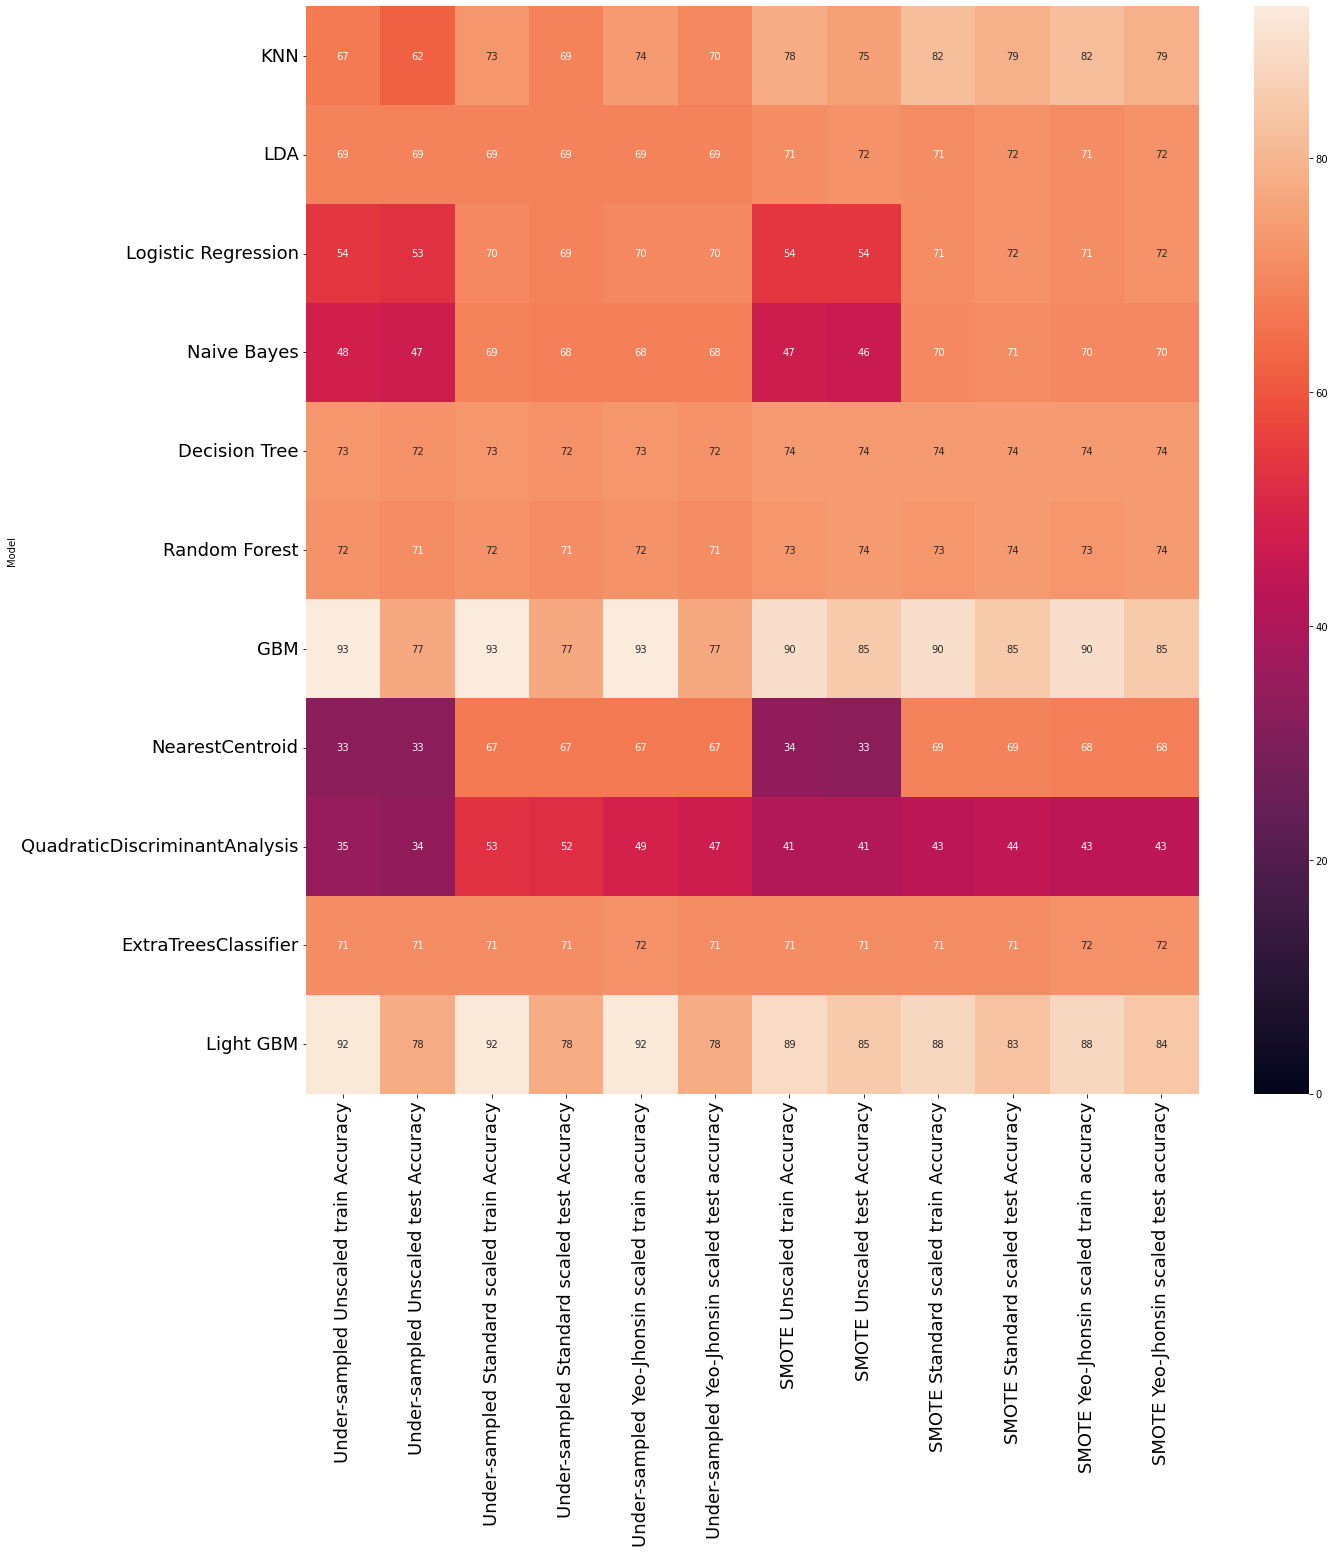

In [167]:
plt.figure(figsize = (20,20))
sns.heatmap(performance, vmin =0, annot = True)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

<h3>Interpretation:</h3>
<p>Both GBM and Light GBM gives the better performance and Light GBM is 70 times faster than the GBM. So, I am choosing Light GBM model.</p>

<h3>Feature Selection: </h3>
<p>I am using the forward feature selection method for the identification of the useful features by choosing the stimator as Light GBM.</p>

In [168]:
#Supporting Functions:
def forward_feature_selection (model, X, y, test_size, random_state):
    show_steps = False
    
    included = []
    best = {'feature': '','Accuracy': 0}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, 
                                                        test_size = test_size)
    
    
    n = X_train.shape[0]
    accuracy_list = []
    while True:
        changed = False
    
        if show_steps:
            print('') 

    # list the features to be evaluated
        excluded = list(set(X.columns) - set(included))
    
        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
        for new_column in excluded:
        
            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
            fit = model.fit(X_train[included + [new_column]], y_train)
        
            accuracy = model.score(X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
            k = len(included) + 1
        
            if show_steps:
                print('(Step) - Accuracy: This = %.3f; Best = %.3f' % 
                  (best['Accuracy']))

        # if model improves
            if accuracy > best['Accuracy']:
            # record new parameters
                best = {'feature': new_column, 'Accuracy': accuracy}
            # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; Accuracy = %.3f' %
                      (best['feature'], best['Accuracy']))
                
        if changed:
        # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            accuracy_list.append(accuracy)
            
        
            print('Added feature %-4s with Accuracy = %.3f ' %(best['feature'], best['Accuracy']))
        else:
        # terminate if no better model
            break

    print('')
    print(f'Number of resulting features : {len(included)}')
    print('Resulting features:')
    print(', '.join(included))
    print (f'Accuracy : {accuracy_list}')

In [209]:
lgbm_sm_ffs = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
forward_feature_selection (lgbm_sm_ffs, X_sm, y_sm, 0.2, 42)

Added feature Credit_Mix with Accuracy = 0.639 
Added feature Interest_Rate with Accuracy = 0.720 
Added feature Outstanding_Debt with Accuracy = 0.767 
Added feature Delay_from_due_date with Accuracy = 0.808 
Added feature Total_EMI_per_month with Accuracy = 0.838 
Added feature Num_Bank_Accounts with Accuracy = 0.850 
Added feature Num_Credit_Inquiries with Accuracy = 0.854 
Added feature Num_Credit_Card with Accuracy = 0.862 
Added feature Age  with Accuracy = 0.869 
Added feature Payment_of_Min_Amount with Accuracy = 0.871 
Added feature Annual_Income with Accuracy = 0.876 
Added feature Spent_Behaviour with Accuracy = 0.882 
Added feature Num_of_Delayed_Payment with Accuracy = 0.884 
Added feature Monthly_Balance with Accuracy = 0.887 
Added feature Mortgage_Loan with Accuracy = 0.888 
Added feature Occupation_Teacher with Accuracy = 0.888 
Added feature Credit_Utilization_Ratio with Accuracy = 0.889 
Added feature Credit_History_Age with Accuracy = 0.891 
Added feature Occupation

<h3> Interpretation:</h3>
<p>22 features chosen as the useful features for credict score classification: </p>

In [185]:
lgbm_ffs_cols = ['Credit_Mix', 'Interest_Rate', 'Outstanding_Debt', 'Delay_from_due_date',
                 'Total_EMI_per_month', 'Num_Bank_Accounts', 'Num_Credit_Inquiries', 
                 'Num_Credit_Card', 'Age', 'Payment_of_Min_Amount', 'Annual_Income', 
                 'Spent_Behaviour', 'Num_of_Delayed_Payment', 'Monthly_Balance',
                 'Mortgage_Loan', 'Occupation_Teacher', 'Credit_Utilization_Ratio', 
                 'Credit_History_Age', 'Occupation_Developer', 'Personal_Loan', 
                 'Monthly_Inhand_Salary', 'Occupation_Mechanic']
X_sm_ffs = X_sm[lgbm_ffs_cols]


In [186]:
lgbm_ffs_sm = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
model_ffs = [lgbm_ffs_sm]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.8948102525525596
Accuracy of Test data : 0.8488951574988246
Execution time: 7.036298036575317 seconds
--------------------------------------------------


<h3>Hyperparameter tuning:</h3>

In [187]:
lgbm_ffs_sm = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
model_ffs = [lgbm_ffs_sm]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=1.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.8948102525525596
Accuracy of Test data : 0.8488951574988246
Execution time: 5.94940185546875 seconds
--------------------------------------------------


In [188]:
lgbm_ffs_sm1 = LGBMClassifier(n_estimators=100, learning_rate=0.1,
                                 max_depth=5, random_state=0)
model_ffs = [lgbm_ffs_sm1]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.7722325395519406
Accuracy of Test data : 0.7687509794703025
Execution time: 6.2701849937438965 seconds
--------------------------------------------------


In [189]:
lgbm_ffs_sm2 = LGBMClassifier(n_estimators=100, learning_rate=2.0,
                                 max_depth=5, random_state=0)
model_ffs = [lgbm_ffs_sm2]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=2.0, max_depth=5, random_state=0) Model:
Accuracy of Training data : 0.5586559784354749
Accuracy of Test data : 0.5627017708823069
Execution time: 2.1170990467071533 seconds
--------------------------------------------------


In [190]:
lgbm_ffs_sm3 = LGBMClassifier(n_estimators=200, learning_rate=1.0,
                                 max_depth=5, random_state=0)
model_ffs = [lgbm_ffs_sm3]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=1.0, max_depth=5, n_estimators=200, random_state=0) Model:
Accuracy of Training data : 0.8414396201133078
Accuracy of Test data : 0.80247610092462
Execution time: 10.060982942581177 seconds
--------------------------------------------------


In [191]:
lgbm_ffs_sm4 = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=6, random_state=0)
model_ffs = [lgbm_ffs_sm4]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=1.0, max_depth=6, random_state=0) Model:
Accuracy of Training data : 0.893799415438382
Accuracy of Test data : 0.8425325184140416
Execution time: 6.792856216430664 seconds
--------------------------------------------------


In [192]:
lgbm_ffs_sm5 = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=4, random_state=0)
model_ffs = [lgbm_ffs_sm5]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=1.0, max_depth=4, random_state=0) Model:
Accuracy of Training data : 0.8406090097714254
Accuracy of Test data : 0.8158282400877606
Execution time: 4.59934401512146 seconds
--------------------------------------------------


In [193]:
lgbm_ffs_sm6 = LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=3, random_state=0)
model_ffs = [lgbm_ffs_sm6]
modelling(model_ffs, X_sm_ffs, y_sm, 0.2, 42)

LGBMClassifier(learning_rate=1.0, max_depth=3, random_state=0) Model:
Accuracy of Training data : 0.8052297107752102
Accuracy of Test data : 0.793292587368751
Execution time: 6.068206071853638 seconds
--------------------------------------------------


<h3>Interpretation:</h3>
<p>Based on the hyper parameter tuning,
LGBMClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
is the best model.</p>

<h3>Cross Validation:</h3>

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_sm_ffs, y_sm, 
                                                    random_state = 42, test_size = 0.2)


In [195]:
scores = cross_val_score(lgbm_ffs_sm, X_train, y_train, cv=10)
cross_val = pd.DataFrame ({'Iterations' : [1,2,3,4,5,6,7,8,9,10], 'CV scores' : scores})
cross_val.set_index('Iterations', inplace = True)

In [196]:
mean_cv = cross_val['CV scores'].mean()
std_cv = cross_val['CV scores'].std()
print(f'Mean CV score : {mean_cv}')
print(f'Standard deviation of CV scores :{std_cv}')

Mean CV score : 0.8271236988541808
Standard deviation of CV scores :0.016463683140198977


<h3> Interpretation</h3>
<p>The standard deviation of the 10 fold cross validation score is 0.016 which is only 1.6%. </p>

<h3>Feature Importances:</h3>

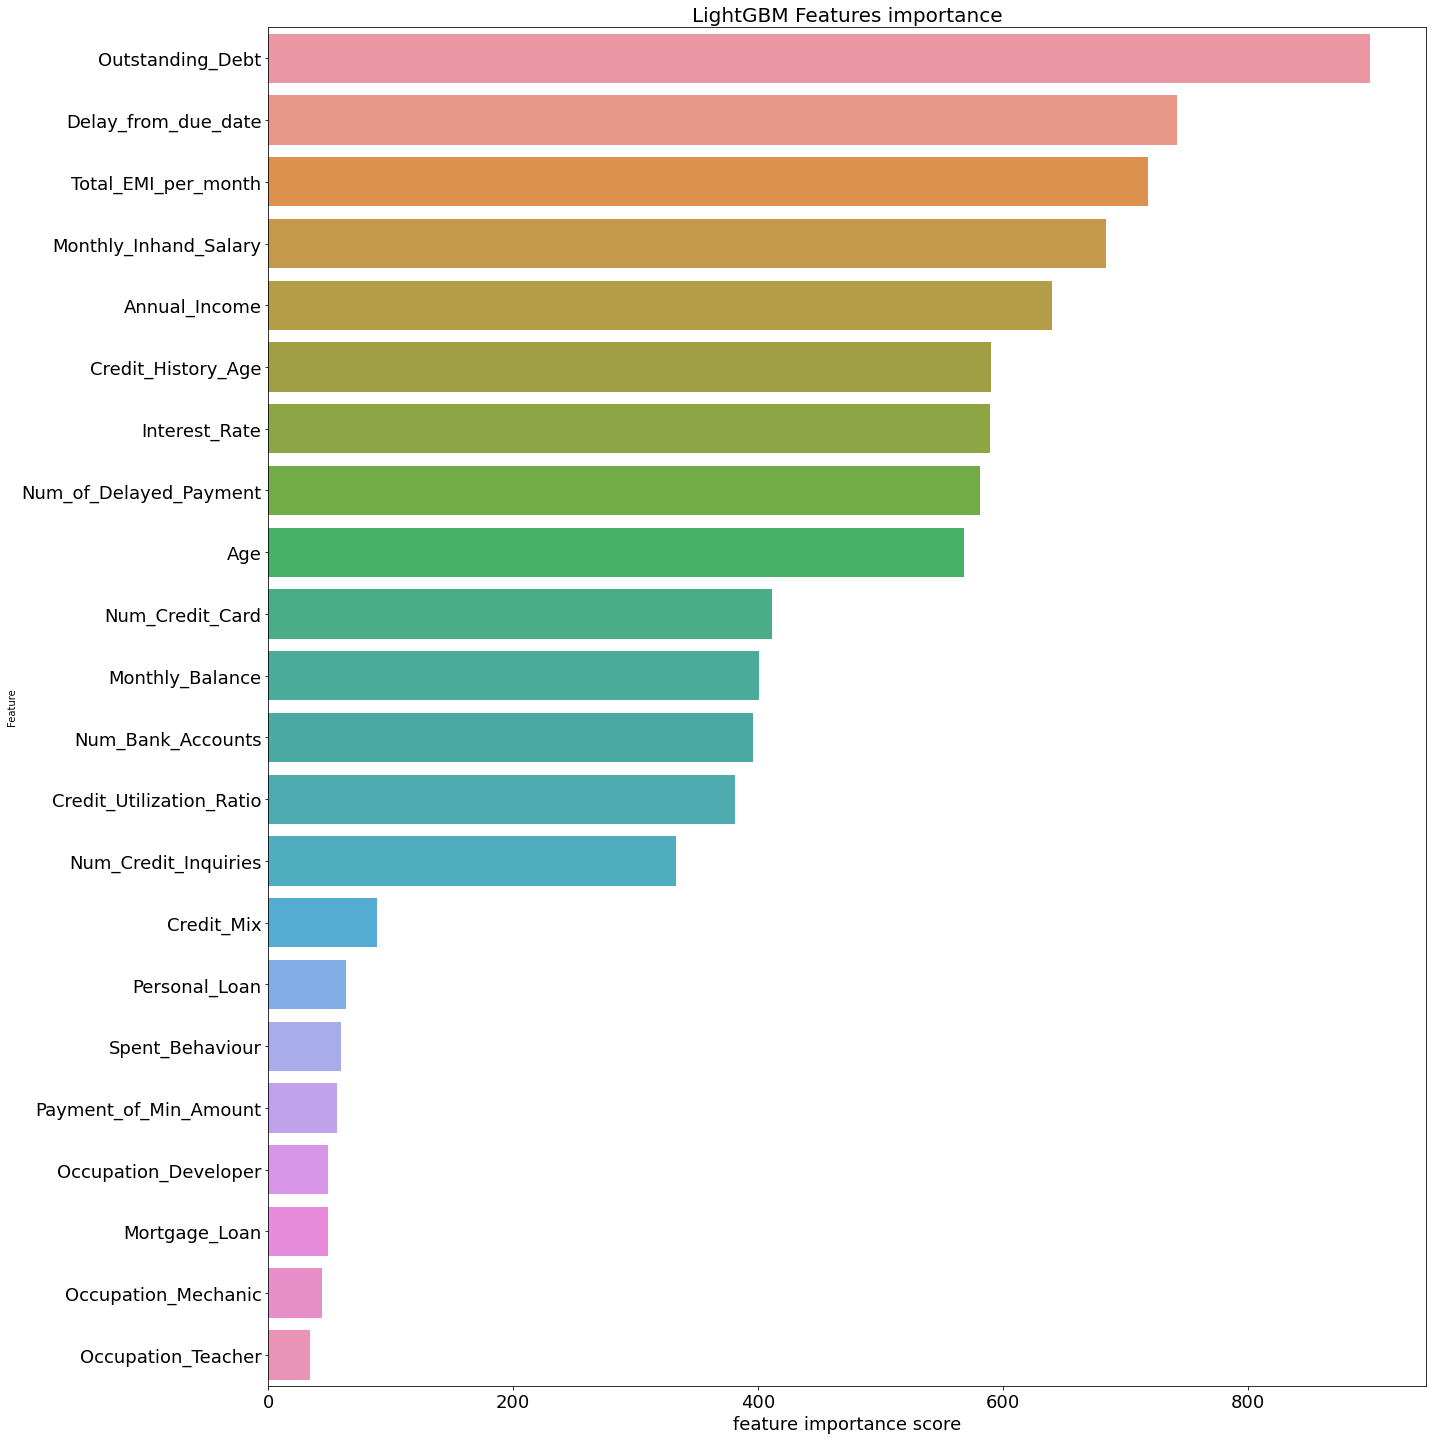

In [197]:

feature_imp = pd.DataFrame(sorted(zip(lgbm_ffs_sm.feature_importances_,X_sm_ffs.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features importance', fontsize = 20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.xlabel('feature importance score',fontsize = 18)
plt.show()


<h3> Interpretation:</h3>
<p>Outstanding debt, Monthly inhand salary, Delay_from_due_date, Total EMI per month, Annual income, age, Number of delayed payment, credit history age and interest rate are the most important features for credit score classification. </p>

<h3>Model Evaluation:</h3>

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_sm_ffs, y_sm, 
                                                    random_state = 42, 
                                                    test_size = 0.2)
lgbm_ffs_sm.fit(X_train, y_train)

y_pred_lgbm_ffs_sm = lgbm_ffs_sm.predict(X_test)


int64
19930     2
75724     2
51506     1
97010     2
39363     2
         ..
138798    3
112307    1
132184    1
118550    1
40049     2
Name: Credit_Score, Length: 31905, dtype: int64


In [220]:
y_pred_lgbm_ffs_sm.dtype

dtype('int64')

matrix = confusion_matrix(y_test, y_pred_lgbm_ffs_sm)
print(matrix)
rep = classification_report(y_test, y_pred_lgbm_ffs_sm, target_names = ['Good', 'Standard', 'Poor'])
print(rep)

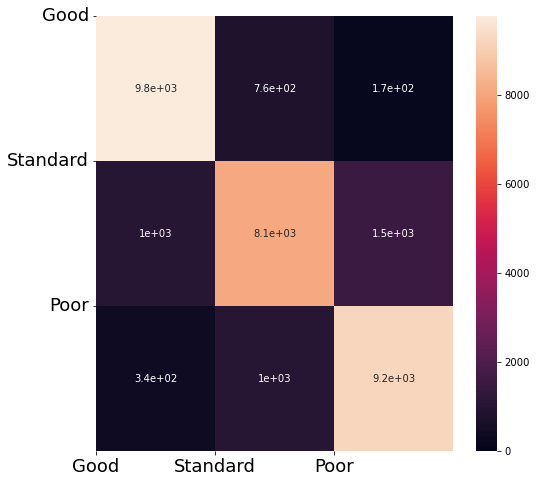

In [212]:
plt.figure(figsize = (8,8))
sns.heatmap(matrix, vmin =0, annot = True)
plt.xticks([0, 1, 2], ['Good', 'Standard', 'Poor'],fontsize = 18)
plt.yticks([0, 1, 2], ['Good', 'Standard', 'Poor'], fontsize = 18, rotation=0)
plt.show()

In [224]:
matrix = pd.DataFrame(confusion_mat)
matrix.columns = ['predicted_Good','predicted_Standard','predicted_Poor']
matrix.index = ['Actual_Good','Actual_Standard','Actual_Poor']
print (matrix)

                 predicted_Good  predicted_Standard  predicted_Poor
Actual_Good                9777                 765             168
Actual_Standard            1023                8100            1494
Actual_Poor                 345                1026            9207


<p>*********************************** End of Notebook ***********************************</p>